# SUBMITTED BY:
# 1)SANKALP MITTAL CS21MTECH12010
# 2)SHIKHAR JAIN CS22MTECH02002
# 3)SURANJAN DAW CS21MTECH12008
# 4)SANYOG SHARMA AI21MTECH12003
# 5)AKSHAD SHYAM PURUSHOTTAMDAS AI22MTECH02006

# Importing required modules/libraries

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

# Give your dataset file path

In [ ]:
dataset_path=r"/home/cs22mtech02002/Iron_dealers_data.csv"

# Routines to get all the cycles of lngth 'n' in the graph

In [ ]:
def findPaths(G,u,n):
    if n==0:
        return [[u]]
    paths = [[u]+path for neighbor in G.neighbors(u) for path in findPaths(G,neighbor,n-1)]
    return paths

def find_cycles(G,u,n):
    paths = findPaths(G,u,n)
    return [tuple(path) for path in paths if (path[-1] == u) and sum(x ==u for x in path) == 2]

# read the dataset csv and generate 1) Directed Multi-weighted graph 2) By summing all the parallel edges generate Directed Weighted Simple Graph 

In [2]:
df = pd.read_csv(dataset_path)
# print("^^^^",df.colulen(cyc2_tuple_list)mns)
x1 = set(df["Seller ID"])
x2 = set(df["Buyer ID"])
node_set = sorted(list(x1.union(x2)))
l = list(range(len(node_set)))
# print(node_set[0], node_set[-1])

dict_nodes = {}

for i in range(len(node_set)):
    if node_set[i] not in dict_nodes:
        dict_nodes[node_set[i]] = l[i]

G = nx.MultiDiGraph()
buyers_id = list(df["Buyer ID"])
sellers_id = list(df["Seller ID"])
weights = list(df["Value"])
for i in range(len(df)):
    G.add_edge(dict_nodes[sellers_id[i]], dict_nodes[buyers_id[i]], weight=weights[i])

di_G=nx.DiGraph()
count=0
for u, v, d in G.edges(data=True):
#         print(u,v,d)
    count+=1
#         print("**",count)
    if di_G.has_edge(u,v)==True:
        di_G[u][v]['weight']+=d['weight']
    else:
        di_G.add_edge(u,v,weight=d['weight'])


# *********************** below code is just for representative purpose .All unique cycles of length 2,3,4,5 are calculated and stored in "cycles.txt"  ************************ 
# all_3_cycles=[]
# all_2_cycles=[]

# for node in l:
#     all_3_cycles.append(find_cycles(di_G,node,3))
# for node in l:
#     all_2_cycles.append(find_cycles(di_G,node,2))

# all_3_cycles1=[]
# all_2_cycles1=[]
# for node_list in all_3_cycles:
#     for cycle_tuple in node_list:
#         all_3_cycles1.append(cycle_tuple)

# for node_list in all_2_cycles:
#     for cycle_tuple in node_list:
#         all_2_cycles1.append(cycle_tuple)



# all_elem_cycles=set(all_2_cycles1).union(set(all_3_cycles1))

# *****************************************************************************************************




# read the cycles.txt and create new all_elem_cycles
# ******* cycles.txt contains all unique cuycles i.e no cyclic permutation of each cycle is there ******

In [3]:

cyc2_str_list=[]
cyc3_str_list=[]
cyc4_str_list=[]
cyc5_str_list=[]
read2=False
read3=False
read4=False
read5=False


with open(r"/home/cs22mtech02002/cycles.txt",'r') as file_cycles:
    lines=file_cycles.readlines()
    for l in lines:
        l=l.split('\n')[0]
        if "2 cycles" in l:
            read2=True
            read3=False
            read4=False
            read5=False
        if "3 cycles" in l:
            read2=False
            read3=True
            read4=False
            read5=False
        if "4 cycles" in l:
            read2=False
            read3=False
            read4=True
            read5=False
        if "5 cycles" in l:
            read2=False
            read3=False
            read4=False
            read5=True

        if read2:
            cyc2_str_list.append(l)
        elif read3:
            cyc3_str_list.append(l)
        elif read4:
            cyc4_str_list.append(l)
        else:
            cyc5_str_list.append(l)                       




# No. of 2,3,4,5 cycles

In [4]:
print(len(cyc2_str_list))
print(len(cyc3_str_list))
print(len(cyc4_str_list))
print(len(cyc5_str_list))

320
468
1523
2668


In [5]:
cyc2_str_list=cyc2_str_list[1:-1]
cyc3_str_list=cyc3_str_list[1:-1]
cyc4_str_list=cyc4_str_list[1:-1]
cyc5_str_list=cyc5_str_list[1:-1]

In [6]:
cyc2_tuple_list=[]
cyc3_tuple_list=[]
cyc4_tuple_list=[]
cyc5_tuple_list=[]
for x in cyc2_str_list:
    cyc2_tuple_list.append(eval(x))
for x in cyc3_str_list:
    cyc3_tuple_list.append(eval(x))
for x in cyc4_str_list:
    cyc4_tuple_list.append(eval(x))
for x in cyc5_str_list:
    cyc5_tuple_list.append(eval(x))            

In [7]:
all_elem_cycles=set(cyc2_tuple_list).union(set(cyc3_tuple_list))
all_elem_cycles=all_elem_cycles.union(set(cyc4_tuple_list))
all_elem_cycles=all_elem_cycles.union(set(cyc5_tuple_list))
all_elem_cycles=list(all_elem_cycles)

# Get distribution of 2,3,4,5 cycles present in the dataset graph

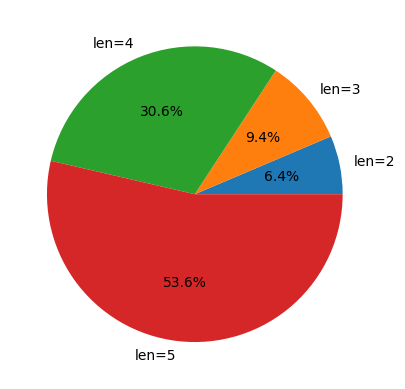

In [8]:
cyc_list_sizes=[len(cyc2_tuple_list),len(cyc3_tuple_list),len(cyc4_tuple_list),len(cyc5_tuple_list)]
labels=["len=2","len=3","len=4","len=5"]
plt.pie(cyc_list_sizes,labels=labels,autopct='%1.1f%%')
plt.show()

# total no. of cycles

In [10]:

len(all_elem_cycles)

4971

# creating a dictionary edge_weights_map which contains weights of each edge 

In [11]:

df = pd.read_csv(dataset_path)
# print("^^^^",df.columns)

x1 = set(df["Seller ID"])
x2 = set(df["Buyer ID"])
node_set = sorted(list(x1.union(x2)))
l = list(range(len(node_set)))
# print(node_set[0], node_set[-1])

dict_nodes = {}

for i in range(len(node_set)):
    if node_set[i] not in dict_nodes:
        dict_nodes[node_set[i]] = l[i]
        
print(dict_nodes)
        
        
seller_ids = list(df["Seller ID"])
buyer_ids = list(df["Buyer ID"])
weights = list(df["Value"])

edge_weights_map = {}

for i in range(len(seller_ids)):
    if((dict_nodes[seller_ids[i]], dict_nodes[buyer_ids[i]]) not in edge_weights_map):
        edge_weights_map[(dict_nodes[seller_ids[i]], dict_nodes[buyer_ids[i]])] = weights[i]
    else:
        edge_weights_map[(dict_nodes[seller_ids[i]], dict_nodes[buyer_ids[i]])] = edge_weights_map[(dict_nodes[seller_ids[i]], dict_nodes[buyer_ids[i]])] + weights[i]

print(edge_weights_map)



{1001: 0, 1002: 1, 1003: 2, 1004: 3, 1005: 4, 1006: 5, 1007: 6, 1008: 7, 1009: 8, 1010: 9, 1011: 10, 1012: 11, 1013: 12, 1014: 13, 1015: 14, 1016: 15, 1017: 16, 1018: 17, 1019: 18, 1020: 19, 1021: 20, 1022: 21, 1023: 22, 1024: 23, 1025: 24, 1026: 25, 1027: 26, 1028: 27, 1029: 28, 1030: 29, 1031: 30, 1032: 31, 1033: 32, 1034: 33, 1035: 34, 1036: 35, 1037: 36, 1038: 37, 1039: 38, 1040: 39, 1041: 40, 1042: 41, 1043: 42, 1044: 43, 1045: 44, 1046: 45, 1047: 46, 1048: 47, 1049: 48, 1050: 49, 1051: 50, 1052: 51, 1053: 52, 1054: 53, 1055: 54, 1056: 55, 1057: 56, 1058: 57, 1059: 58, 1060: 59, 1061: 60, 1062: 61, 1063: 62, 1064: 63, 1065: 64, 1066: 65, 1067: 66, 1068: 67, 1069: 68, 1070: 69, 1071: 70, 1072: 71, 1073: 72, 1074: 73, 1075: 74, 1076: 75, 1077: 76, 1078: 77, 1079: 78, 1080: 79, 1081: 80, 1082: 81, 1083: 82, 1084: 83, 1085: 84, 1086: 85, 1087: 86, 1088: 87, 1089: 88, 1090: 89, 1091: 90, 1092: 91, 1093: 92, 1094: 93, 1096: 94, 1097: 95, 1098: 96, 1099: 97, 1100: 98, 1101: 99, 1102: 100

# ***Count of different types of cycles for each edge***

In [12]:
weight_difference_tol=0.05 # CURRENT TAKING 5% FOR TOLERANCE 
ext=[10]*4
#Create a dictionary counting 2CSW, 2CDW, 3CSW, 3CDW, 4CSW, 4CDW, 5CSW, 5CDW , 2CMW,3CMW,4CMW,5CM
cycle_count = {}
for c in all_elem_cycles:
    #Count 2Cs
    if(len(c) == 3):
        if((c[0], c[1]) not in cycle_count):
            cycle_count[(c[0], c[1])] = [0, 0, 0, 0, 0, 0, 0, 0]+ext
        if((c[1], c[2]) not in cycle_count):
            cycle_count[(c[1], c[2])] = [0, 0, 0, 0, 0, 0, 0, 0]+ext
        #Count 2CSW
        w1 = edge_weights_map[(c[0], c[1])]
        w2 = edge_weights_map[(c[1], c[2])]
        a = abs(w1 - w2)/min(w1,w2)
        ll=np.array([w1,w2])
        std=np.std(ll)/np.mean(ll)
        #if(a <= weight_difference_tol):
        if std<=weight_difference_tol:
            cycle_count[(c[0], c[1])][0] += 1
            cycle_count[(c[1], c[2])][0] += 1
            cycle_count[(c[0], c[1])][-4] = max(w1, w2, cycle_count[(c[0], c[1])][-4])
            cycle_count[(c[1], c[2])][-4] = max(w1, w2, cycle_count[(c[1], c[2])][-4])

        else:
            cycle_count[(c[0], c[1])][1] += 1
            cycle_count[(c[1], c[2])][1] += 1
    #Count 3Cs
    elif(len(c) == 4):
        if((c[0], c[1]) not in cycle_count):
            cycle_count[(c[0], c[1])] = [0, 0, 0, 0, 0, 0, 0, 0]+ext
        if((c[1], c[2]) not in cycle_count):
            cycle_count[(c[1], c[2])] = [0, 0, 0, 0, 0, 0, 0, 0]+ext
        if((c[2], c[3]) not in cycle_count):
            cycle_count[(c[2], c[3])] = [0, 0, 0, 0, 0, 0, 0, 0]+ext
        w1 = edge_weights_map[(c[0], c[1])]
        w2 = edge_weights_map[(c[1], c[2])]
        w3 = edge_weights_map[(c[2], c[3])]
        a1 = abs(w1 - w2)/min(w1,w2)
        a2 = abs(w2 - w3)/min(w2,w3)
        a3 = abs(w1 - w3)/min(w1,w3)
        ll=np.array([w1,w2,w3])
        std=np.std(ll)/np.mean(ll)
        #if(a1 <= weight_difference_tol and a2 <= weight_difference_tol and a3 <= weight_difference_tol):
        if std<=weight_difference_tol:
            cycle_count[(c[0], c[1])][2] += 1
            cycle_count[(c[1], c[2])][2] += 1
            cycle_count[(c[2], c[3])][2] += 1
            cycle_count[(c[0], c[1])][-3] =max(w1, w2, w3, cycle_count[(c[0], c[1])][-3])
            cycle_count[(c[1], c[2])][-3] = max(w1, w2, w3, cycle_count[(c[1], c[2])][-3])
            cycle_count[(c[2], c[3])][-3] = max(w1, w2, w3, cycle_count[(c[2], c[3])][-3])
        else:
            cycle_count[(c[0], c[1])][3] += 1
            cycle_count[(c[1], c[2])][3] += 1
            cycle_count[(c[2], c[3])][3] += 1
            
    #Count 4Cs
    elif(len(c) == 5):
        if((c[0], c[1]) not in cycle_count):
            cycle_count[(c[0], c[1])] = [0, 0, 0, 0, 0, 0, 0, 0]+ext
        if((c[1], c[2]) not in cycle_count):
            cycle_count[(c[1], c[2])] = [0, 0, 0, 0, 0, 0, 0, 0]+ext
        if((c[2], c[3]) not in cycle_count):
            cycle_count[(c[2], c[3])] = [0, 0, 0, 0, 0, 0, 0, 0]+ext
        if((c[3], c[4]) not in cycle_count):
            cycle_count[(c[3], c[4])] = [0, 0, 0, 0, 0, 0, 0, 0]+ext
        w1 = edge_weights_map[(c[0], c[1])]
        w2 = edge_weights_map[(c[1], c[2])]
        w3 = edge_weights_map[(c[2], c[3])]
        w4 = edge_weights_map[(c[3], c[4])]
        a1 = abs(w1 - w2)/min(w1,w2)
        a2 = abs(w2 - w3)/min(w2,w3)
        a3 = abs(w3 - w4)/min(w3,w4)
        a4 = abs(w1 - w4)/min(w1,w4)
        ll=np.array([w1,w2,w3,w4])
        std=np.std(ll)/np.mean(ll)
        #if(a1 <= weight_difference_tol and a2 <= weight_difference_tol and a3 <= weight_difference_tol and a4 <= weight_difference_tol):
        if std<=weight_difference_tol:
            cycle_count[(c[0], c[1])][4] += 1
            cycle_count[(c[1], c[2])][4] += 1
            cycle_count[(c[2], c[3])][4] += 1
            cycle_count[(c[3], c[4])][4] += 1
            cycle_count[(c[0], c[1])][-2] =max(w1, w2, w3, w4,cycle_count[(c[0], c[1])][-2])
            cycle_count[(c[1], c[2])][-2] =max(w1, w2, w3, w4,cycle_count[(c[1], c[2])][-2])
            cycle_count[(c[2], c[3])][-2] = max(w1, w2, w3, w4,cycle_count[(c[2], c[3])][-2])
            cycle_count[(c[3], c[4])][-2] = max(w1, w2, w3, w4,cycle_count[(c[3], c[4])][-2])
        else:
            cycle_count[(c[0], c[1])][5] += 1
            cycle_count[(c[1], c[2])][5] += 1
            cycle_count[(c[2], c[3])][5] += 1
            cycle_count[(c[3], c[4])][5] += 1
    
    elif(len(c) == 6):
        if((c[0], c[1]) not in cycle_count):
            cycle_count[(c[0], c[1])] = [0, 0, 0, 0, 0, 0, 0, 0]+ext
        if((c[1], c[2]) not in cycle_count):
            cycle_count[(c[1], c[2])] = [0, 0, 0, 0, 0, 0, 0, 0]+ext
        if((c[2], c[3]) not in cycle_count):
            cycle_count[(c[2], c[3])] = [0, 0, 0, 0, 0, 0, 0, 0]+ext
        if((c[3], c[4]) not in cycle_count):
            cycle_count[(c[3], c[4])] = [0, 0, 0, 0, 0, 0, 0, 0]+ext
        if((c[4], c[5]) not in cycle_count):
            cycle_count[(c[4], c[5])] = [0, 0, 0, 0, 0, 0, 0, 0]+ext
        w1 = edge_weights_map[(c[0], c[1])]
        w2 = edge_weights_map[(c[1], c[2])]
        w3 = edge_weights_map[(c[2], c[3])]
        w4 = edge_weights_map[(c[3], c[4])]
        w5 = edge_weights_map[(c[4], c[5])]
        a1 = abs(w1 - w2)/min(w1,w2)
        a2 = abs(w2 - w3)/min(w2,w3)
        a3 = abs(w3 - w4)/min(w3,w4)
        a4 = abs(w4 - w5)/min(w4,w5)
        a5 = abs(w1 - w5)/min(w1,w5)
        ll=np.array([w1,w2,w3,w4,w5])
        std=np.std(ll)/np.mean(ll)
        #if(a1 <= weight_difference_tol and a2 <= weight_difference_tol and a3 <= weight_difference_tol and a4 <= weight_difference_tol and a5<=weight_difference_tol):
        if std<=weight_difference_tol:
            cycle_count[(c[0], c[1])][6] += 1
            cycle_count[(c[1], c[2])][6] += 1
            cycle_count[(c[2], c[3])][6] += 1
            cycle_count[(c[3], c[4])][6] += 1
            cycle_count[(c[4], c[5])][6] += 1
            cycle_count[(c[0], c[1])][-1] =max(w1, w2, w3, w4,w5,cycle_count[(c[0], c[1])][-1])
            cycle_count[(c[1], c[2])][-1] =max(w1, w2, w3, w4,w5,cycle_count[(c[1], c[2])][-1])
            cycle_count[(c[2], c[3])][-1] =max(w1, w2, w3, w4,w5,cycle_count[(c[2], c[3])][-1])
            cycle_count[(c[3], c[4])][-1] =max(w1, w2, w3, w4,w5,cycle_count[(c[3], c[4])][-1])
            cycle_count[(c[4], c[5])][-1] =max(w1, w2, w3, w4,w5,cycle_count[(c[4], c[15])][-1])
        else:
            cycle_count[(c[0], c[1])][7] += 1
            cycle_count[(c[1], c[2])][7] += 1
            cycle_count[(c[2], c[3])][7] += 1
            cycle_count[(c[3], c[4])][7] += 1
            cycle_count[(c[4], c[5])][7] += 1
        
print(cycle_count)
            
        

{(0, 236): [0, 1, 0, 5, 0, 54, 0, 328, 10, 10, 10, 10], (236, 103): [0, 1, 0, 3, 0, 5, 0, 48, 10, 10, 10, 10], (103, 48): [0, 1, 0, 8, 0, 5, 0, 11, 10, 10, 10, 10], (48, 103): [0, 1, 0, 5, 0, 2, 0, 2, 10, 10, 10, 10], (103, 0): [0, 0, 0, 1, 0, 11, 0, 136, 10, 10, 10, 10], (6, 103): [0, 1, 0, 9, 0, 8, 0, 20, 10, 10, 10, 10], (103, 375): [0, 1, 0, 2, 0, 1, 0, 5, 10, 10, 10, 10], (375, 6): [0, 1, 0, 1, 0, 13, 0, 6, 10, 10, 10, 10], (48, 3): [0, 0, 0, 7, 0, 35, 0, 7, 10, 10, 10, 10], (3, 75): [0, 0, 0, 4, 0, 28, 0, 26, 10, 10, 10, 10], (75, 48): [0, 1, 0, 3, 0, 10, 0, 8, 10, 10, 10, 10], (42, 353): [0, 1, 0, 3, 0, 2, 0, 4, 10, 10, 10, 10], (353, 310): [0, 1, 0, 1, 0, 1, 0, 3, 10, 10, 10, 10], (310, 134): [0, 0, 0, 0, 0, 1, 0, 4, 10, 10, 10, 10], (134, 240): [0, 0, 0, 0, 0, 0, 0, 1, 10, 10, 10, 10], (240, 42): [0, 0, 0, 2, 0, 1, 0, 2, 10, 10, 10, 10], (236, 36): [0, 1, 0, 1, 0, 1, 0, 37, 10, 10, 10, 10], (36, 172): [0, 0, 0, 0, 0, 5, 0, 12, 10, 10, 10, 10], (172, 135): [0, 0, 0, 0, 0, 1, 0,

#***ACTUAL "SIMILAR" WEIGHT CYCLES IN THE PROVIDED DATASET***

In [13]:
for x in cycle_count.keys():
    a, b, c, d =cycle_count[x][0], cycle_count[x][2], cycle_count[x][4], cycle_count[x][6]
    if(a>0 or b>0 or c>0 or d>0):
        print(x,cycle_count[x])

(67, 267) [1, 0, 0, 2, 0, 5, 0, 11, 529119.0, 10, 10, 10]
(267, 67) [1, 0, 0, 0, 0, 2, 0, 1, 529119.0, 10, 10, 10]
(360, 137) [1, 0, 0, 2, 0, 3, 0, 5, 790058.0, 10, 10, 10]
(144, 9) [1, 0, 0, 0, 0, 2, 0, 3, 753878.0, 10, 10, 10]
(9, 144) [1, 0, 0, 2, 0, 3, 0, 7, 753878.0, 10, 10, 10]
(137, 360) [1, 0, 0, 0, 0, 1, 0, 1, 790058.0, 10, 10, 10]
(19, 187) [1, 0, 0, 0, 0, 0, 0, 1, 1954788.0, 10, 10, 10]
(187, 19) [1, 0, 0, 0, 0, 1, 0, 2, 1954788.0, 10, 10, 10]
(387, 76) [1, 0, 0, 0, 0, 1, 0, 0, 33139.0, 10, 10, 10]
(76, 387) [1, 0, 0, 0, 0, 1, 0, 0, 33139.0, 10, 10, 10]


#***Mapping weights of each edge for newly constructed undirected weighted graph***

In [15]:

two_cycle_same_weight=100
three_cycle_same_weight=3000
two_cycle_not_same_weight=0.000001
three_cycle_not_same_weight=0.000001
two_cycle_in_3_cycle_count=0
four_cycle_same_weight=5000
five_cycle_same_weight=10000
four_cycle_not_same_weight=0.000001
five_cycle_not_same_weight=0.000001
#weight_difference_tol = 0.05 # 5%
edge_semantics = {}
for e in cycle_count:
    if(e not in edge_semantics):
        edge_semantics[e] = 0
    edge_semantics[e] = ((two_cycle_same_weight * cycle_count[e][0])  + (two_cycle_not_same_weight * cycle_count[e][1])) * math.log10(cycle_count[e][-4]) + \
    ((three_cycle_same_weight * cycle_count[e][2]) + (three_cycle_not_same_weight * cycle_count[e][3]))* math.log10(cycle_count[e][-3]) +\
                                                                                                                     ((four_cycle_same_weight * cycle_count[e][4]) + (four_cycle_not_same_weight * cycle_count[e][5]))* math.log10(cycle_count[e][-2]) + \
                                                                                                                        ((five_cycle_same_weight * cycle_count[e][6]) + (five_cycle_not_same_weight * cycle_count[e][7])) * math.log10(cycle_count[e][-1])
    #edge_semantics[e] = ((two_cycle_same_weight * cycle_count[e][0]) + (two_cycle_not_same_weight * cycle_count[e][1]) + (three_cycle_same_weight * cycle_count[e][2]) + (three_cycle_not_same_weight * cycle_count[e][3]) + (four_cycle_same_weight * cycle_count[e][4]) + (four_cycle_not_same_weight * cycle_count[e][5]) + (five_cycle_same_weight * cycle_count[e][6]) + (five_cycle_not_same_weight * cycle_count[e][7]))
print(edge_semantics)
print(max(edge_semantics.values()))

{(0, 236): 0.000388, (236, 103): 5.7e-05, (103, 48): 2.4999999999999998e-05, (48, 103): 9.999999999999999e-06, (103, 0): 0.000148, (6, 103): 3.8e-05, (103, 375): 8.999999999999999e-06, (375, 6): 2.1e-05, (48, 3): 4.9e-05, (3, 75): 5.8e-05, (75, 48): 2.2e-05, (42, 353): 9.999999999999999e-06, (353, 310): 6e-06, (310, 134): 4.9999999999999996e-06, (134, 240): 1e-06, (240, 42): 4.9999999999999996e-06, (236, 36): 3.9999999999999996e-05, (36, 172): 1.7e-05, (172, 135): 8e-06, (135, 0): 0.000228, (106, 207): 6.999999999999999e-06, (207, 333): 4e-06, (333, 207): 8e-06, (207, 106): 9.999999999999999e-06, (0, 36): 0.000489, (36, 39): 1.1e-05, (39, 397): 4e-06, (397, 135): 1.5e-05, (6, 38): 3.3e-05, (38, 53): 8e-06, (53, 290): 1.4e-05, (290, 6): 2.6e-05, (15, 97): 4.6e-05, (97, 402): 6e-06, (402, 55): 5.999999999999999e-06, (55, 15): 1.9e-05, (1, 22): 0.00017999999999999998, (22, 291): 2.7999999999999996e-05, (291, 70): 6e-06, (70, 214): 1.2e-05, (214, 1): 9.7e-05, (0, 133): 0.000568, (133, 15):

# ***Creating new undirected graph from the adjacency matrix***

In [16]:
final_graph = nx.Graph()
for i in range(799):
    for j in range(799):
        flag = False
        wt = 0
        if((i, j) in edge_semantics):
            wt = max(wt, edge_semantics[(i,j)])
            flag = True
        if ((j, i) in edge_semantics):
            wt = max(wt, edge_semantics[(j, i)])
            flag = True
        if(flag):
            final_graph.add_edge(i, j, weight = wt,pos=(i,j))


# ***applying node2vec algo***

In [22]:

from node2vec import Node2Vec

# Generate walks
emb_dim=130
wl=400
nwl=100
p=0.7
q=1.4
node2vec = Node2Vec(final_graph, dimensions=emb_dim, walk_length=wl, num_walks=nwl, workers=130,p=p,q=q) #kindly change no.of workers according to your machine

# Learn embeddings
model = node2vec.fit(window=5, min_count=100)



/home/cs22mtech02002/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating walks (CPU: 95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]
Generating walks (CPU: 101): 0it [00:00, ?it/s]
Generating walks (CPU: 96): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]
Generating walks (CPU: 102): 0it [00:00, ?it/s]
Generating walks (CPU: 103): 0it [00:00, ?it/s]
Generating walks (CPU: 97): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]
Generating walks (CPU: 104): 0it [00:00, ?it/s]
Generating walks (CPU: 99): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]
Generating walks (CPU: 105): 0it [00:00, ?it/s]
Generating walks (CPU: 100): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]
Generating walks (CPU: 106): 0it [00:00, ?it/s]
Generating walks (CPU: 107): 0it [00:00, ?it/s]
Generating walks (C

In [23]:
node_embeddings={}
# Get the embeddings of all nodes
for node in final_graph.nodes():
    node_embeddings[str(node)] = model.wv[str(node)]

In [25]:
embs = []
# Print the embeddings of the first five nodes
for node, embedding in list(node_embeddings.items()):    
    embs.append(embedding)


# *** Implemenation of elbow method to determine the epsilon and associated min_pts for the DBSCAN Algo which serves as its hyperparams*** 

In [32]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
 
def find_eps(X, min_pts):    
    nn = NearestNeighbors(n_neighbors=min_pts+1, algorithm='kd_tree')
    nn.fit(X)
    distances, _ = nn.kneighbors(X)
    k_distances = distances[:, -1]
    k_distances.sort()
    k = min(50, len(k_distances)-1)
    gaps = k_distances[1:] - k_distances[:-1]
    avg_gaps = np.zeros(k)
    for i in range(k):
        avg_gaps[i] = np.mean(gaps[i:i+5])
    idx = np.argmax(avg_gaps)
    eps = k_distances[idx]
    return eps
 
def find_min_pts(X, eps):
    nn = NearestNeighbors(radius=eps, algorithm='kd_tree')
    nn.fit(X)
    counts = np.array([len(n) for n in nn.radius_neighbors(X, eps)[0]])
    min_pts = int(np.mean(counts))
    return min_pts


In [106]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X = np.array(embs).reshape(len(embs), emb_dim)
# Find optimal values of eps and min_pts
eps = find_eps(X, min_pts=2)
min_pts = find_min_pts(X, eps)
print(eps,min_pts)

# Plotting the "ELBOW" .As can be seen from the plot it is having multiple elbows hence we put the hyperparams manually

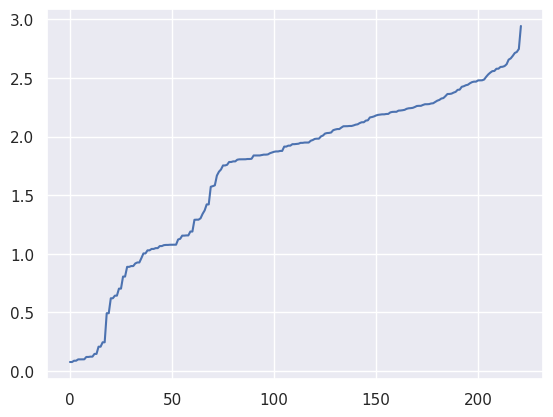

In [107]:
import numpy as np
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
 
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
 
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


# ***Implementing DBSCAN and generatinmg cluster vector/dir out of it***

In [99]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
X = np.array(embs).reshape(len(embs), emb_dim)
db = DBSCAN(eps=1.5, min_samples=2).fit(X)
dbscan_labels = db.labels_
print(dbscan_labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  2 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4
 -1 -1 -1  5  5  5  5  5 -1 -1 -1 -1 -1  6 -1 -1  6 -1 -1 -1 -1  6  7 -1
  7 -1  2 -1 -1 -1 -1 -1  8  7 -1 -1 -1 -1 -1 -1  9 -1 -1 10 10 10 11 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 12 12 -1 -1 11 -1
 -1 -1 -1 -1 -1 -1 13 -1 -1 -1 -1 -1 -1 -1 12 12  5 14 14 14 14 -1 -1 -1
 -1 -1 13 13  0 -1 -1 15 -1 -1 -1  8 -1 -1 -1 12 12 -1 -1 -1 -1 -1 -1 15
  4 16  9 17 17 -1 -1 12 12 -1 12 12 18 18 -1 16 16 12 12 19 19 12 12 -1
 12 12 12 12 20 20]
Estimated number of clusters: 21
Estimated number of noise points: 153


# scatter plot for dbscan clusters

## [(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.7211072664359862, 0.11649365628604381, 0.28281430219146486, 1.0), (0.8226066897347175, 0.22906574394463664, 0.30680507497116494, 1.0), (0.8853517877739331, 0.3190311418685121, 0.29042675893886966, 1.0), (0.942560553633218, 0.4057670126874279, 0.2682814302191465, 1.0), (0.9693194925028835, 0.5174163783160323, 0.30426758938869664, 1.0), (0.9873125720876587, 0.6473663975394078, 0.3642445213379469, 1.0), (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0), (0.9953094963475586, 0.8399846212995001, 0.5128027681660899, 1.0), (0.9971549404075356, 0.9118031526336025, 0.6010765090349866, 1.0), (0.9990003844675125, 0.9690119184928874, 0.697039600153787, 1.0), (0.9750096116878124, 0.9900038446751249, 0.7100346020761246, 1.0), (0.9288735101883892, 0.9715494040753557, 0.6380622837370243, 1.0), (0.8565936178392929, 0.942329873125721, 0.6053056516724337, 1.0), (0.7477124183006538, 0.8980392156862746, 0.6274509803

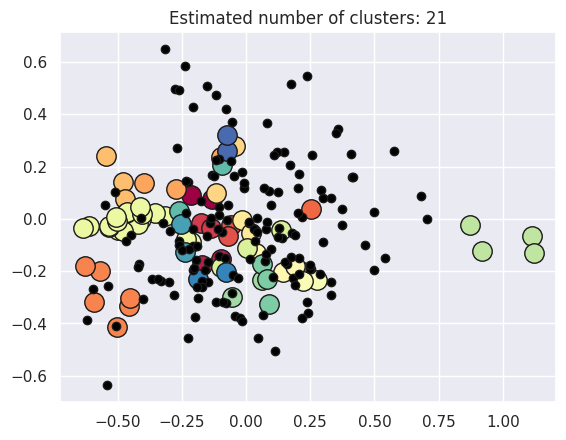

In [100]:

import matplotlib.pyplot as plt
unique_labels = set(dbscan_labels)
core_samples_mask = np.zeros_like(dbscan_labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
print("##",colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = dbscan_labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# tsne plot corresponding the dbscan clusters labels

[137 144  67 187   9  19 327   4  41  85 198 203  37  94 190 193 256 267
 387 466 422  13  63 351  32  24 238 610 112  40 167 247  42 240 310 353
  64  66 360 244  76  93 119 111 120 333 443 126 127 145 280 168 279 197
 340 208 295 218 239 229 343 232 532 299 349 300 344 305 356]


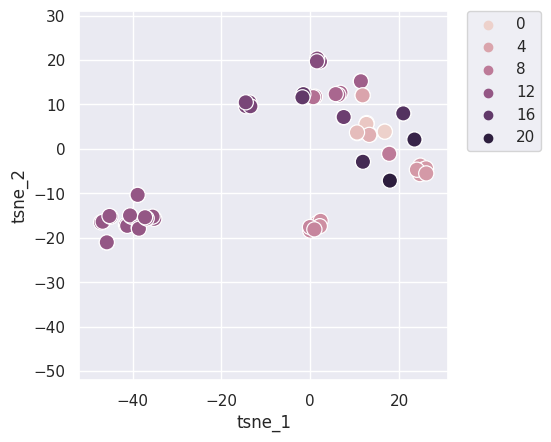

In [102]:

from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
X = np.array(embs).reshape(len(embs), emb_dim)
# print(X)
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components,perplexity=5)
# print(tsne_result.shape)
y = np.array(dbscan_labels)
# print(y)
indices = np.where(y != -1)[0]
# print(indices)
y = y[indices]
# print(y.shape)
X = X[indices]
nodes_under_scrutiny = np.array(list(final_graph.nodes()))[indices]
print(nodes_under_scrutiny)
tsne_result = tsne.fit_transform(X)

# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# ***Generating PCA plot for NODE2VEC Embeddings output. Motivation is if Node2vec is abek to "understand" clusters/community of Fraudelent traders and associated tradings then in PCA we should be able to see clusters/dense regions which are far apart from other regions***

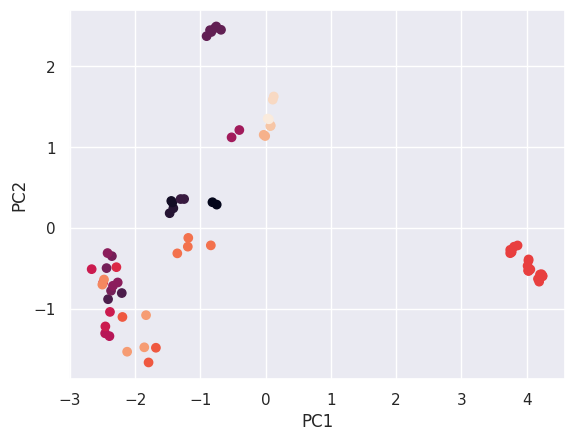

In [103]:
from sklearn.decomposition import PCA
# X = np.array(embs).reshape(len(embs), emb_dim)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()   


# getting nodes corresponding to a cluster

In [104]:

node_class={}
print(len(y))
#print(len(dbscan_labels))
for l in range(len(y)):
    #print(str(dbscan_labels[l]))
    if y[l] not in node_class.keys():
        node_class[y[l]]=[]
    node_class[y[l]].append(nodes_under_scrutiny[l])

print(node_class)



69
{0: [137, 360], 1: [144, 9], 2: [67, 267], 3: [187, 19], 4: [327, 120], 5: [4, 41, 85, 198, 203, 247], 6: [37, 94, 190], 7: [193, 256, 466], 8: [387, 76], 9: [422, 443], 10: [13, 63, 351], 11: [32, 610], 12: [24, 238, 40, 167, 93, 119, 145, 280, 168, 279, 218, 239, 232, 532, 299, 349, 300, 344], 13: [112, 64, 66], 14: [42, 240, 310, 353], 15: [244, 111], 16: [333, 208, 295], 17: [126, 127], 18: [197, 340], 19: [229, 343], 20: [305, 356]}


# get subgraph corresponding each cluster

DiGraph with 2 nodes and 2 edges
**** 780263.0
**** 790058.0
DiGraph with 2 nodes and 2 edges
**** 753878.0
**** 753878.0
DiGraph with 2 nodes and 2 edges
**** 529119.0
**** 529119.0
DiGraph with 2 nodes and 2 edges
**** 1935270.0
**** 1954788.0
DiGraph with 2 nodes and 2 edges
**** 8993149.08
**** 2864425.0
DiGraph with 6 nodes and 20 edges
**** 118646229.68000002
**** 91519336.80000001
**** 15029736.7
**** 15066664.0
**** 40203832.5
**** 321662931.0
**** 325705294.5
**** 349137094.0
**** 57146442.0
**** 219763914.0
**** 68038512.0
**** 131696125.0
**** 118164162.0
**** 467598370.25
**** 399361850.0
**** 277179602.0
**** 205438193.0
**** 57100580.0
**** 220269697.0
**** 67964434.0
DiGraph with 3 nodes and 1 edges
**** 10436146.56
DiGraph with 3 nodes and 3 edges
**** 11182140.049999999
**** 10849737.739999998
**** 2102760.0
DiGraph with 2 nodes and 2 edges
**** 33139.0
**** 33139.0
DiGraph with 2 nodes and 1 edges
**** 274271.0
DiGraph with 3 nodes and 4 edges
**** 860488.0
**** 10291

/tmp/ipykernel_2109674/3838311235.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(figsize=(30,15))


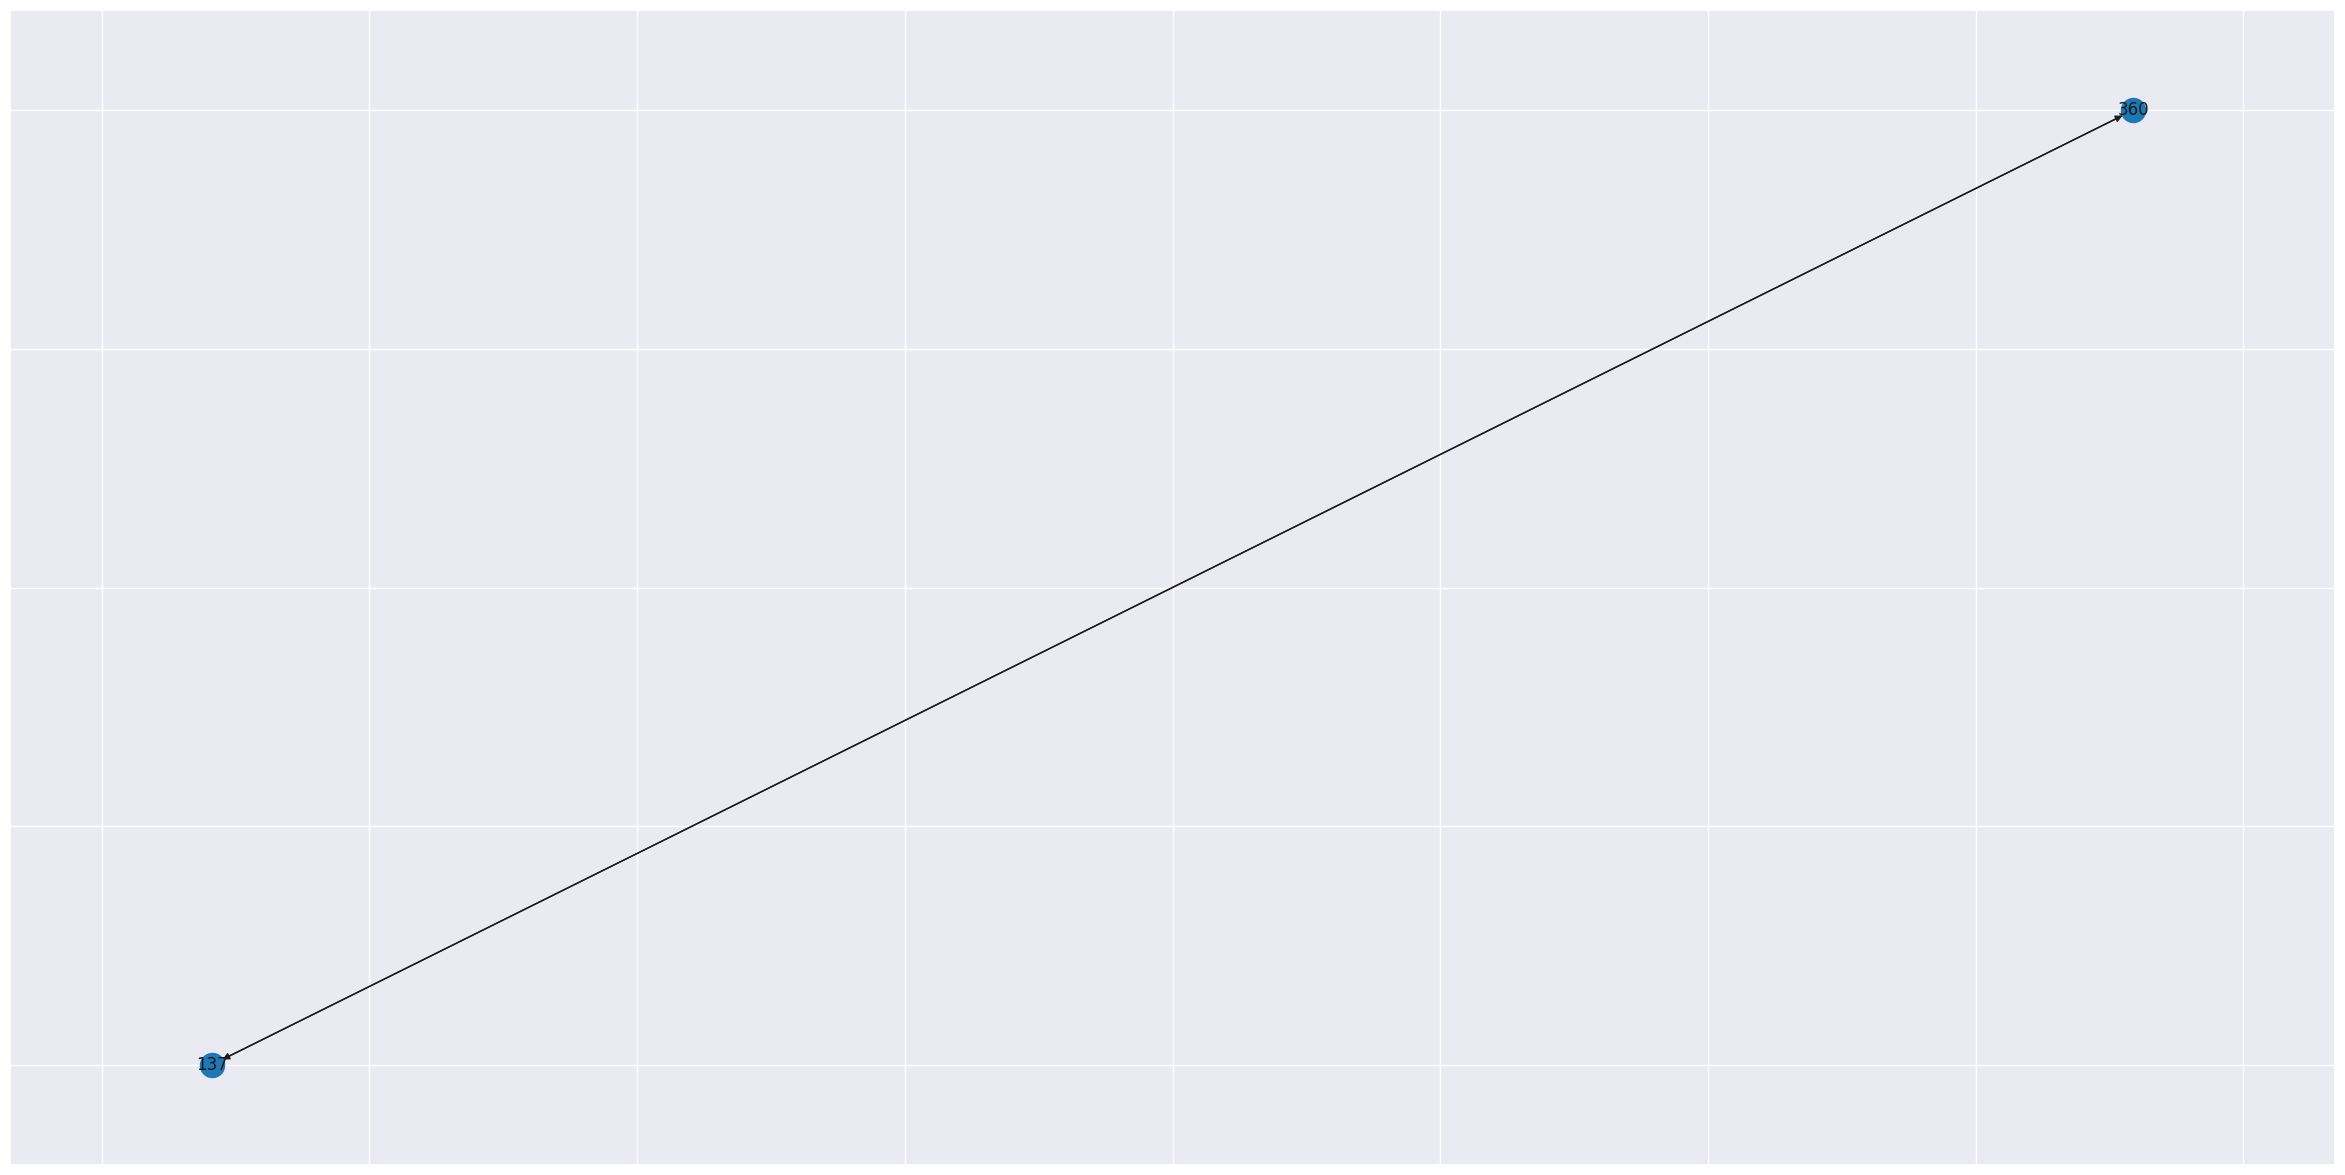

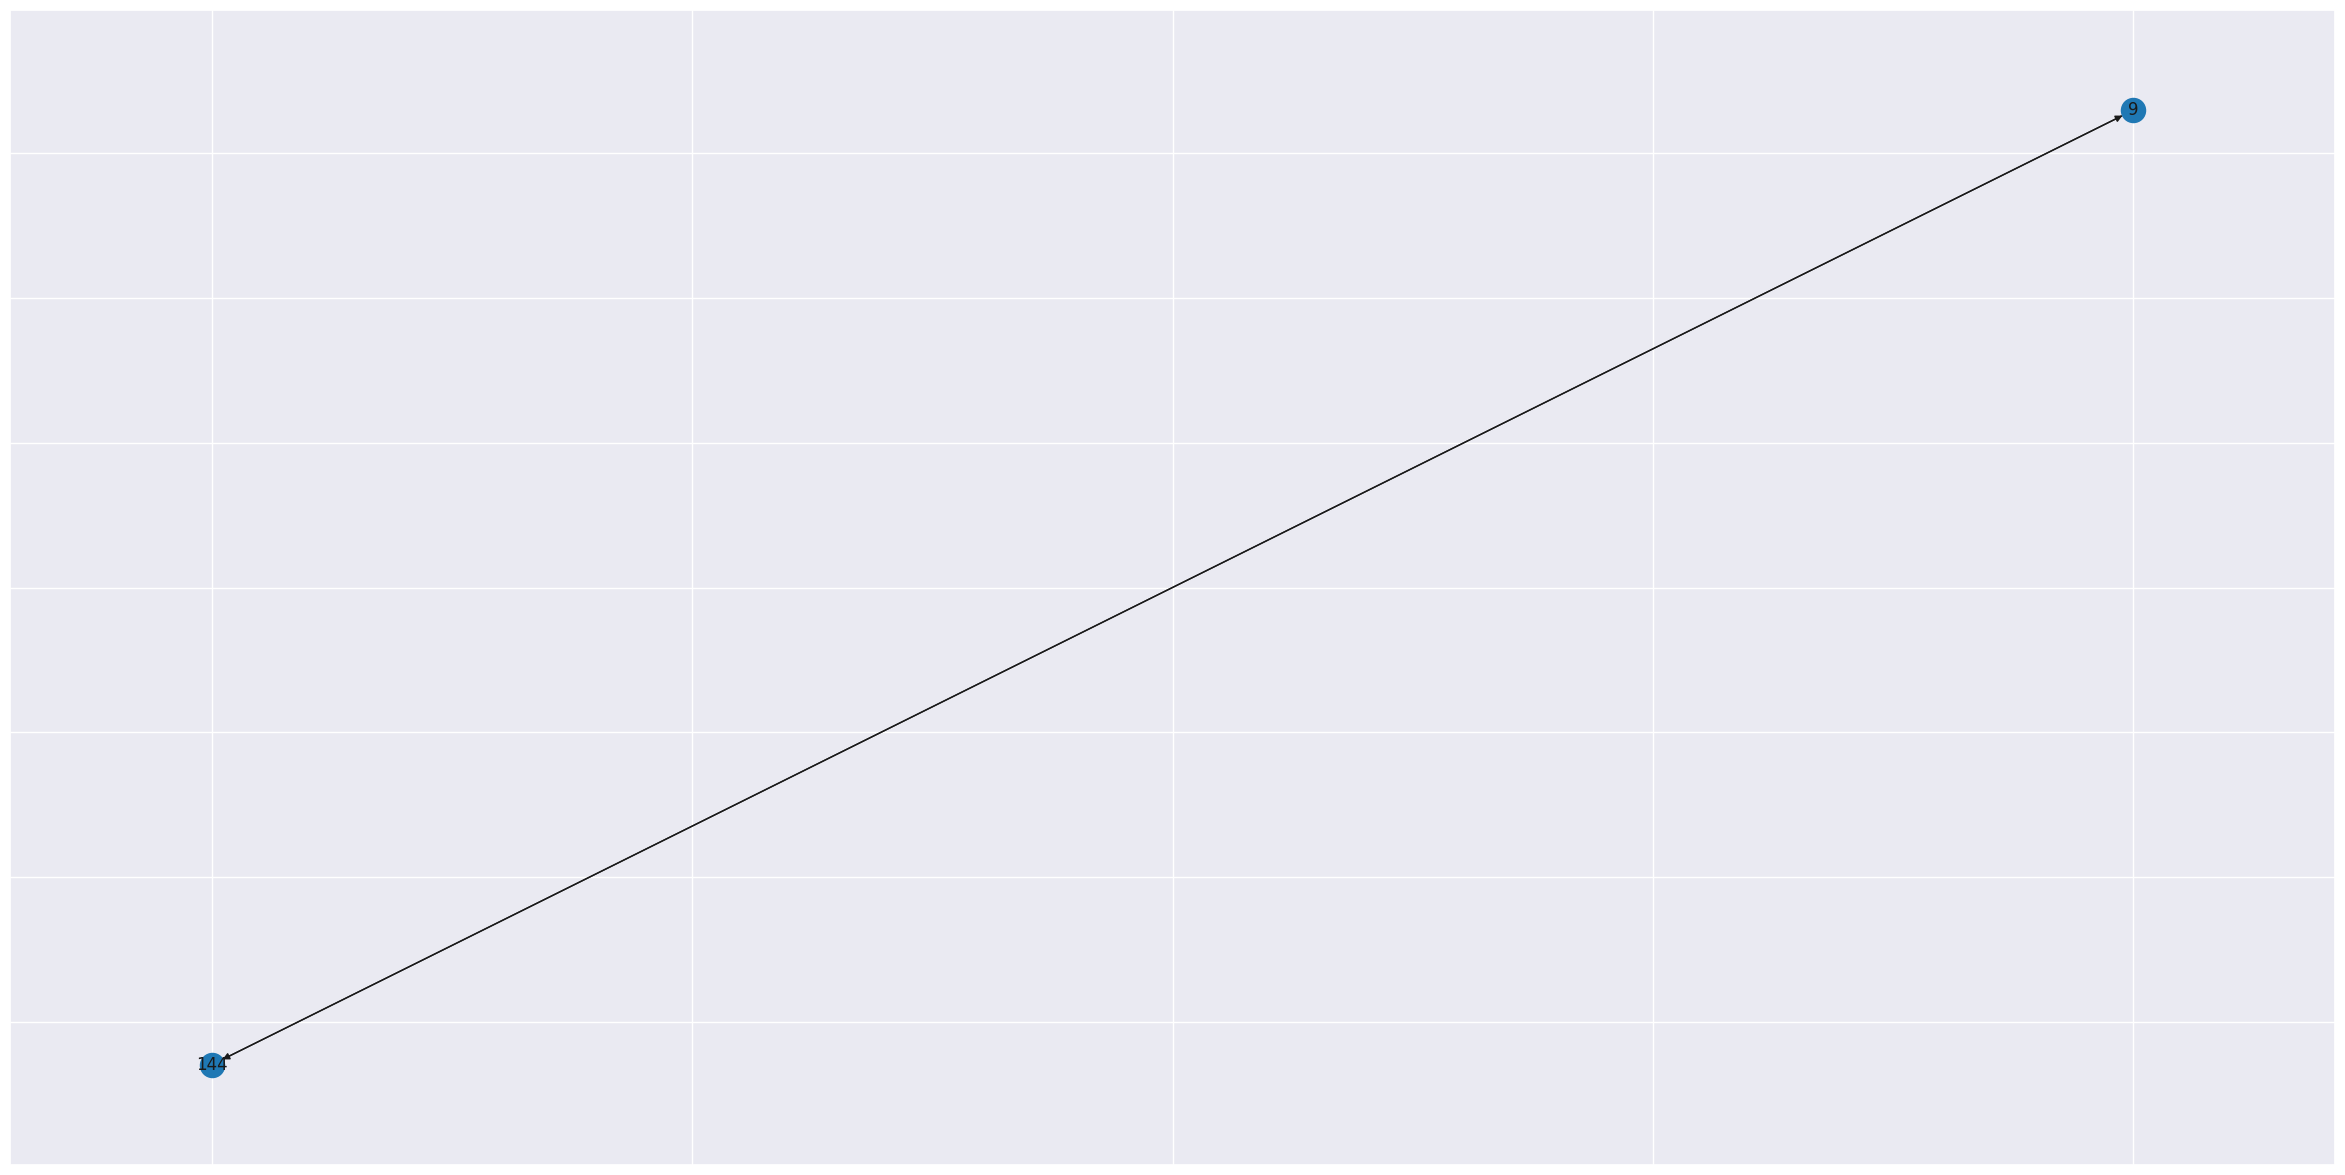

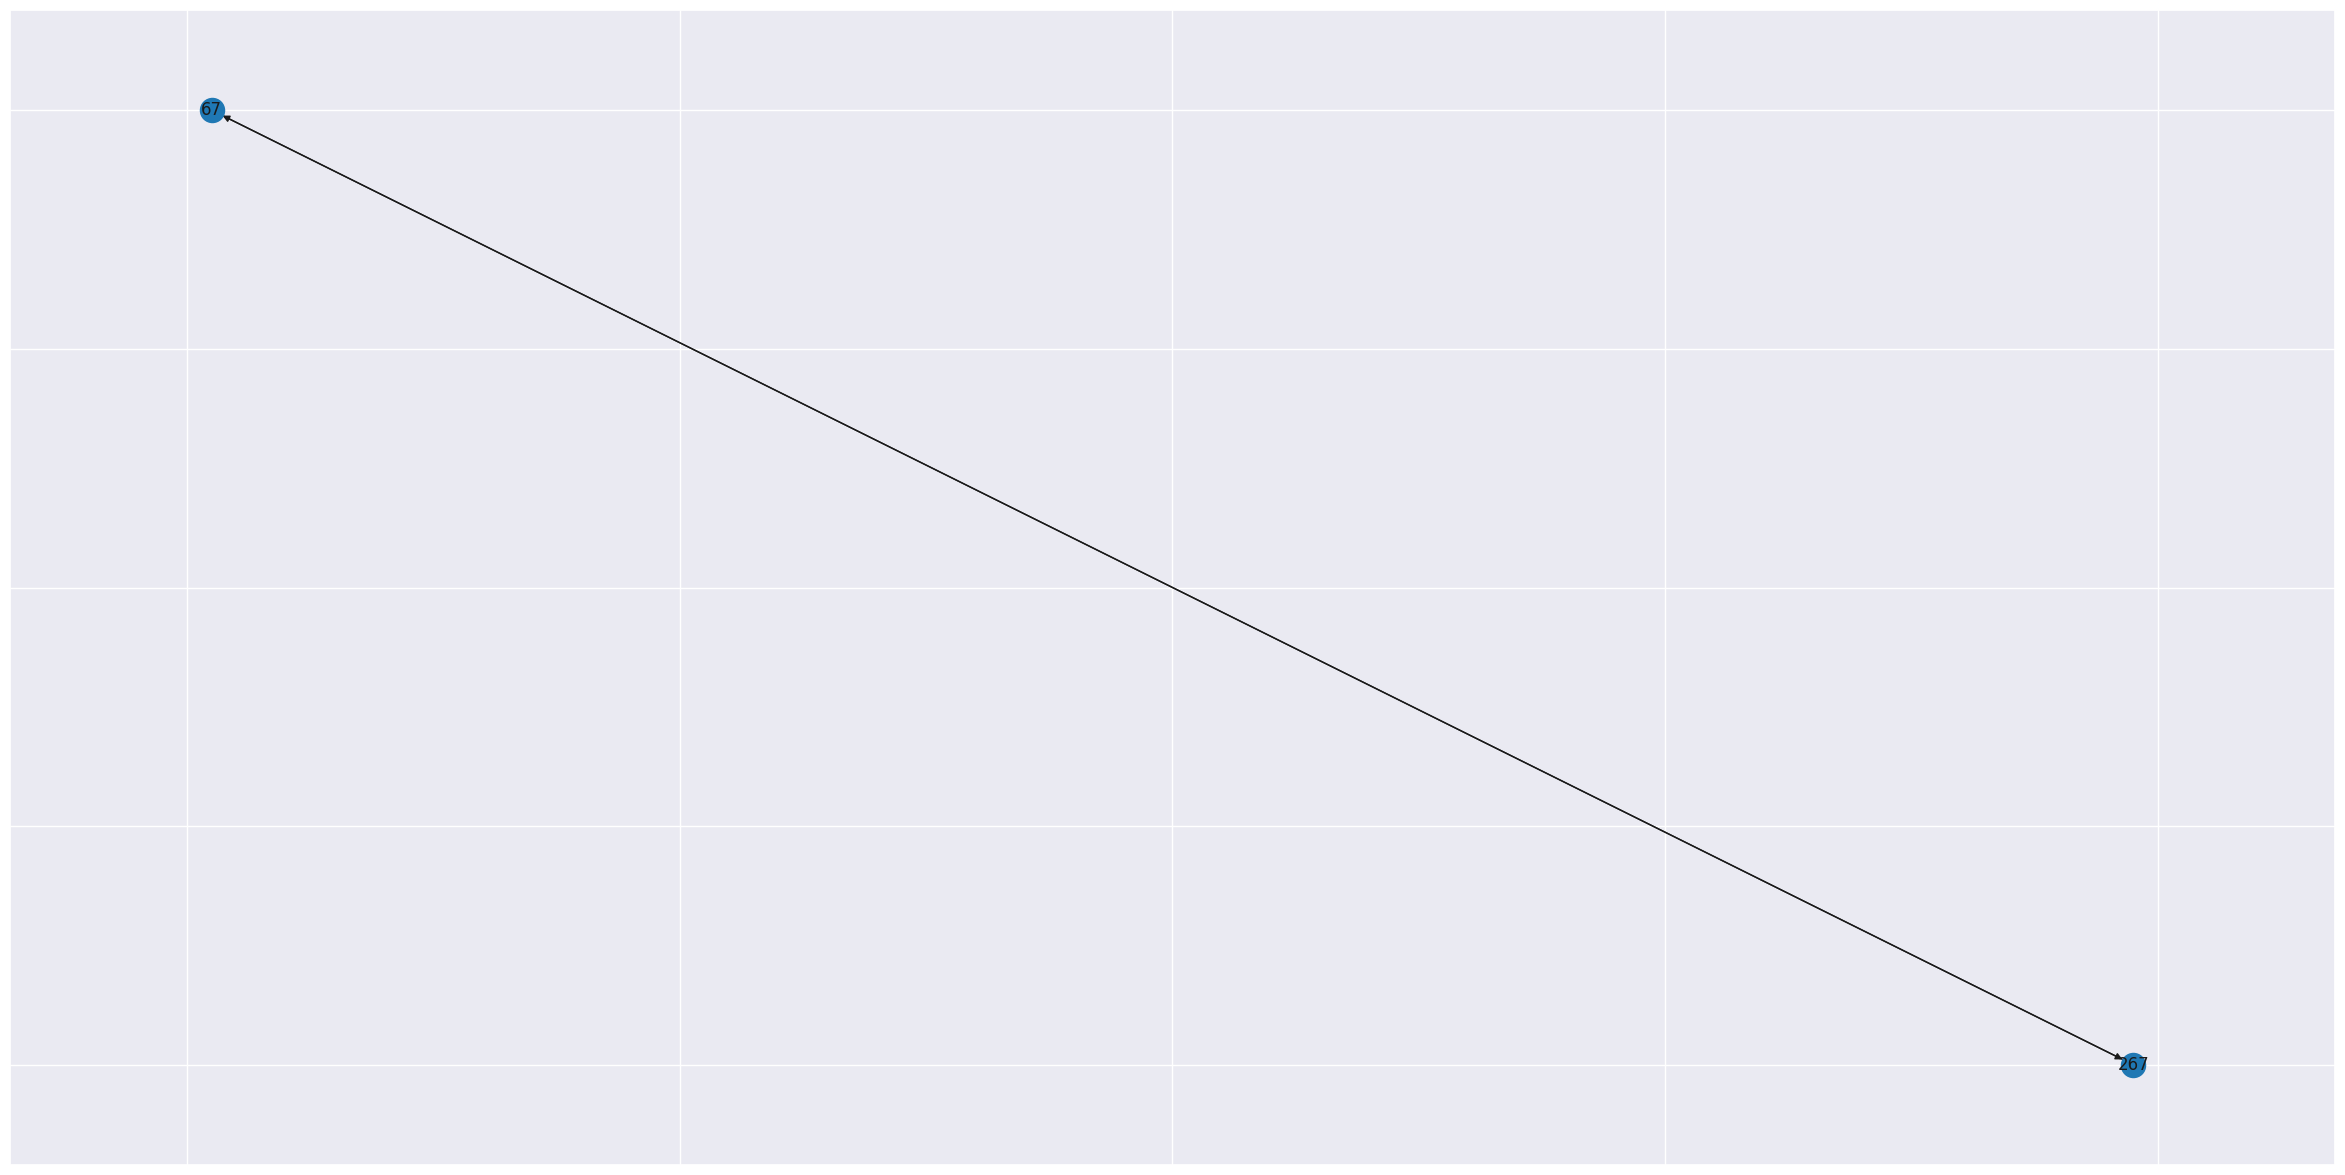

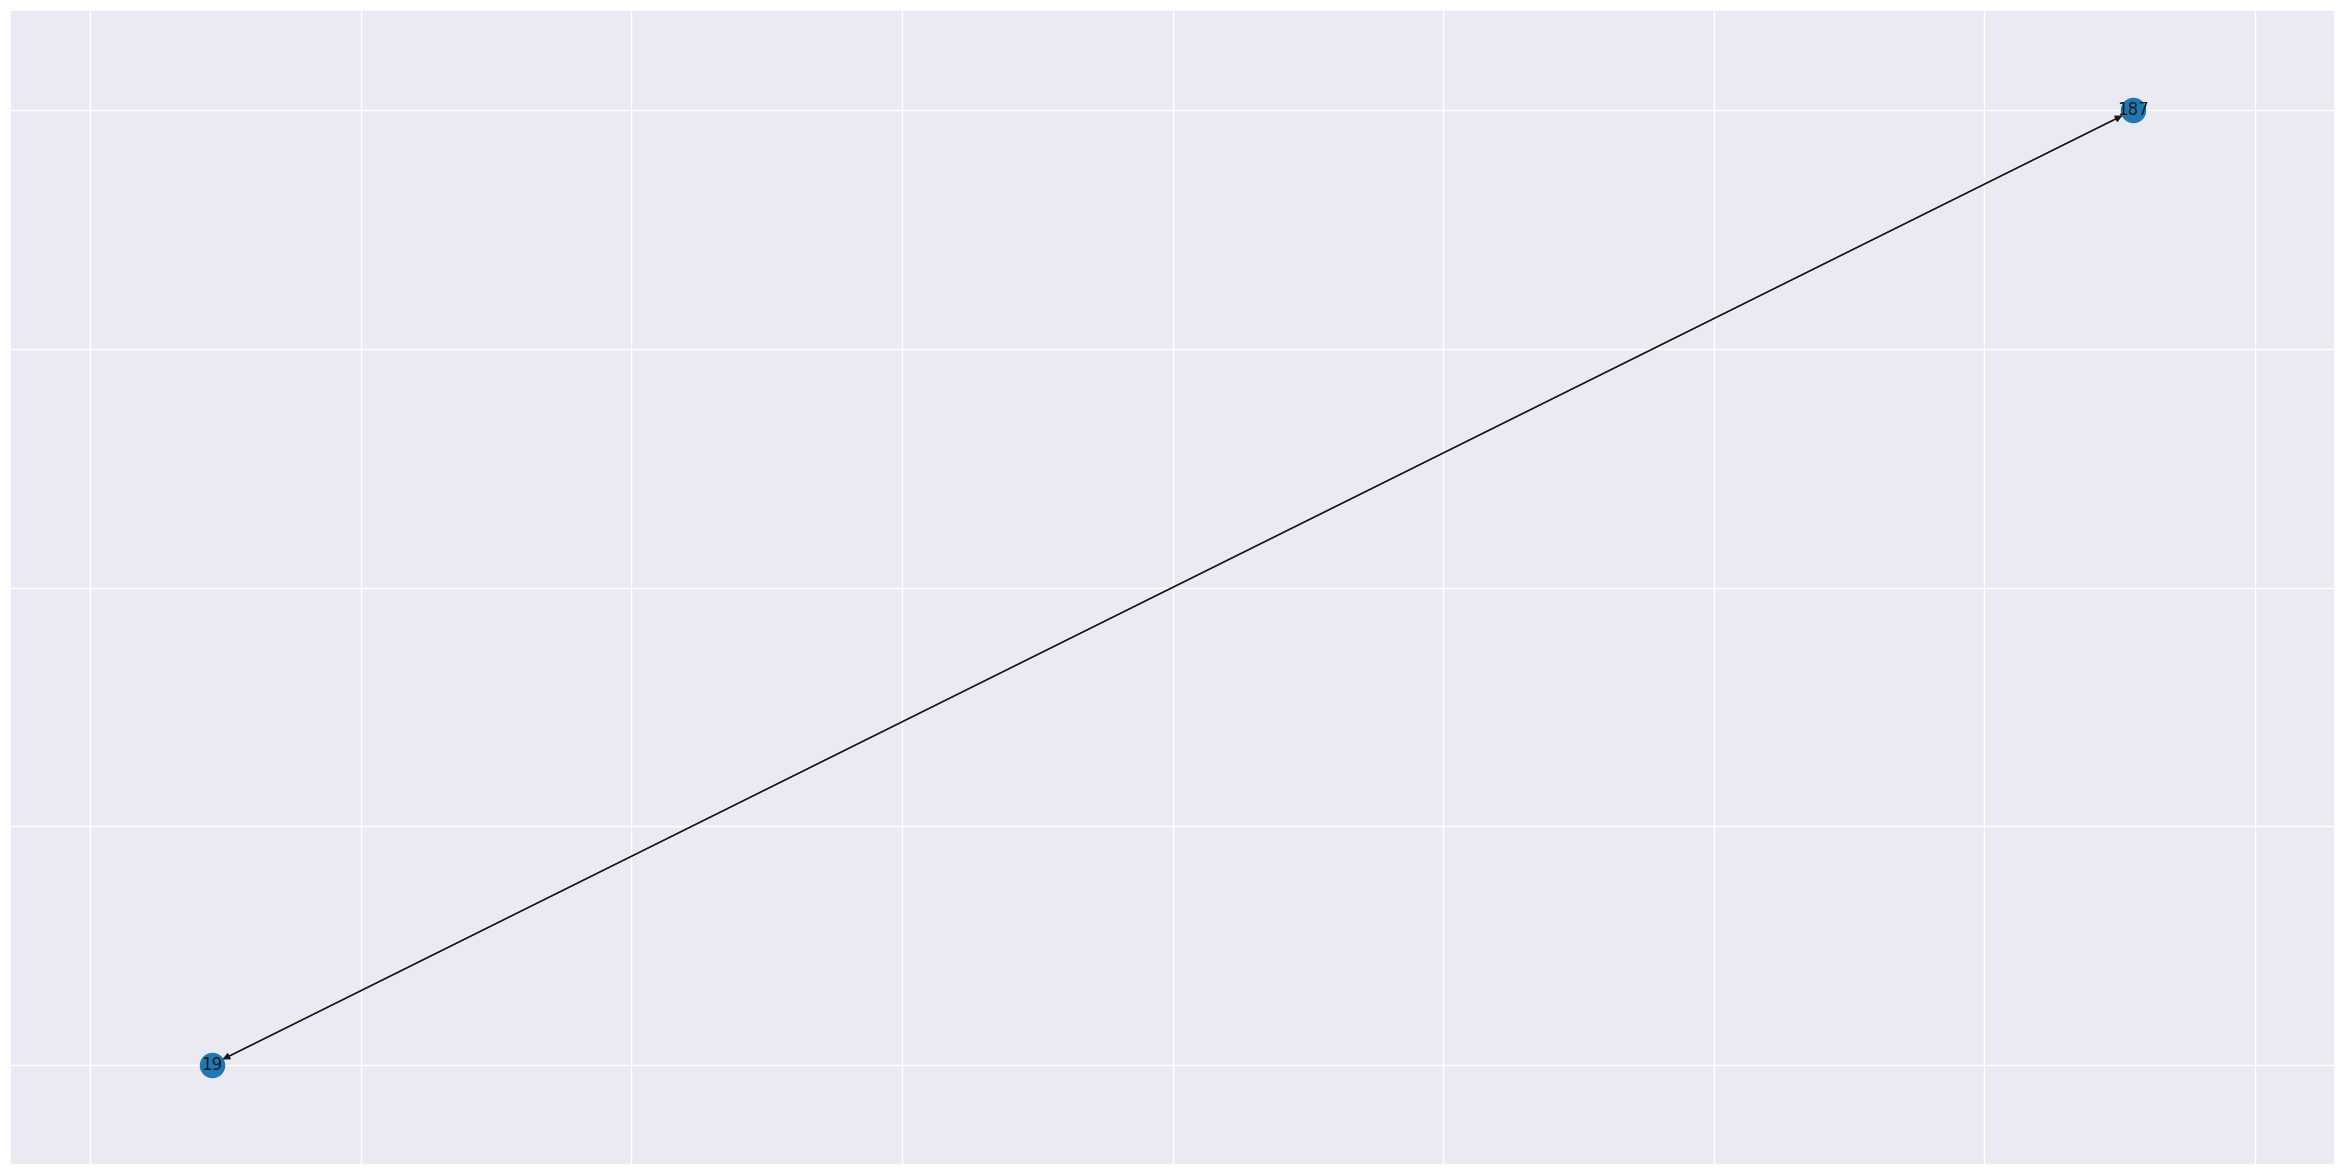

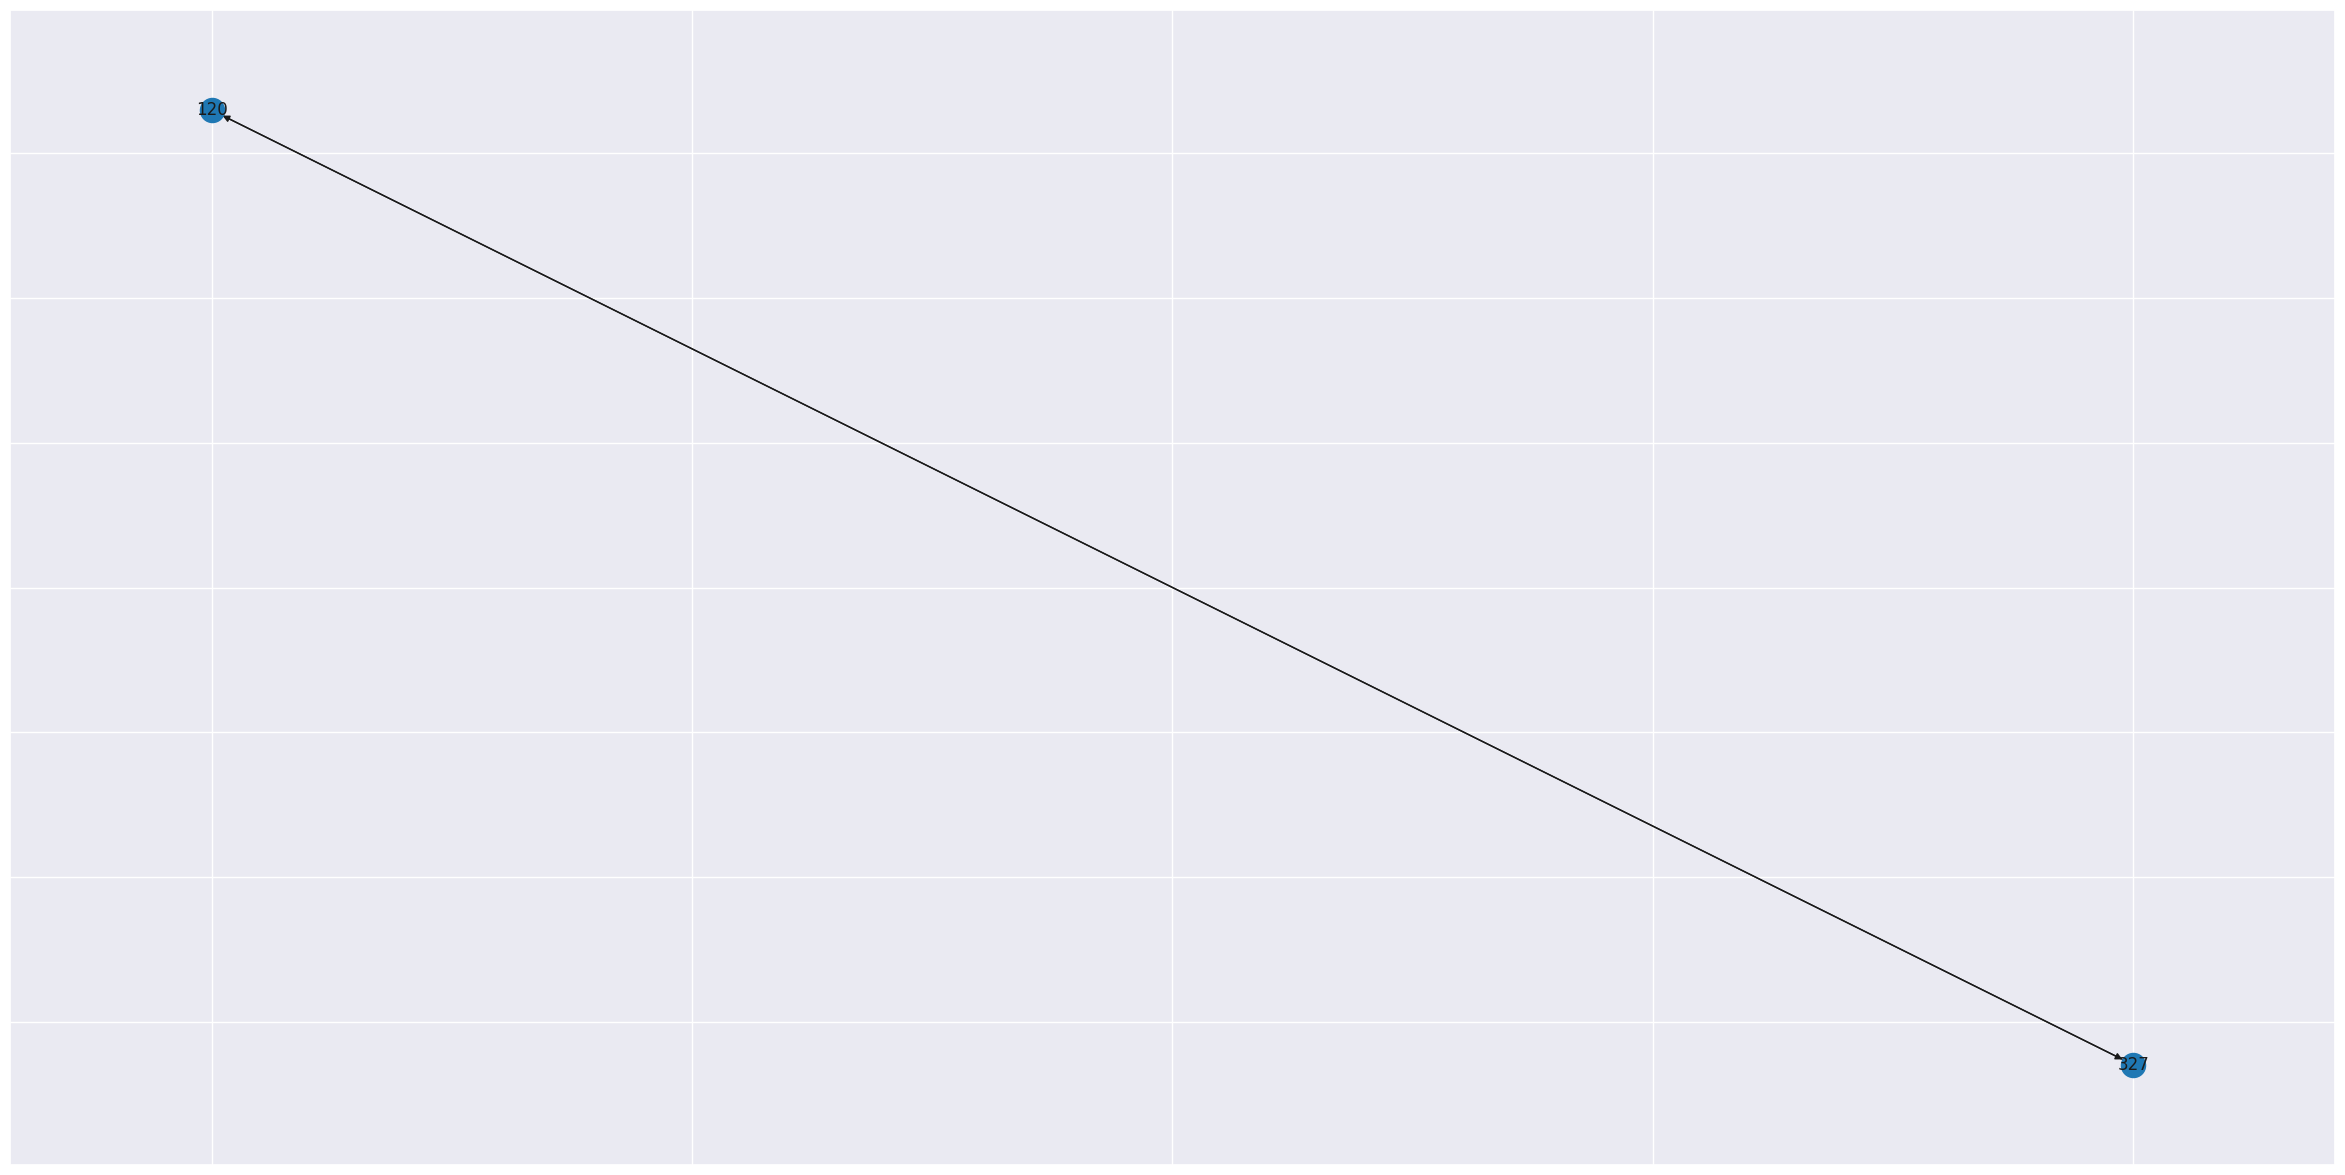

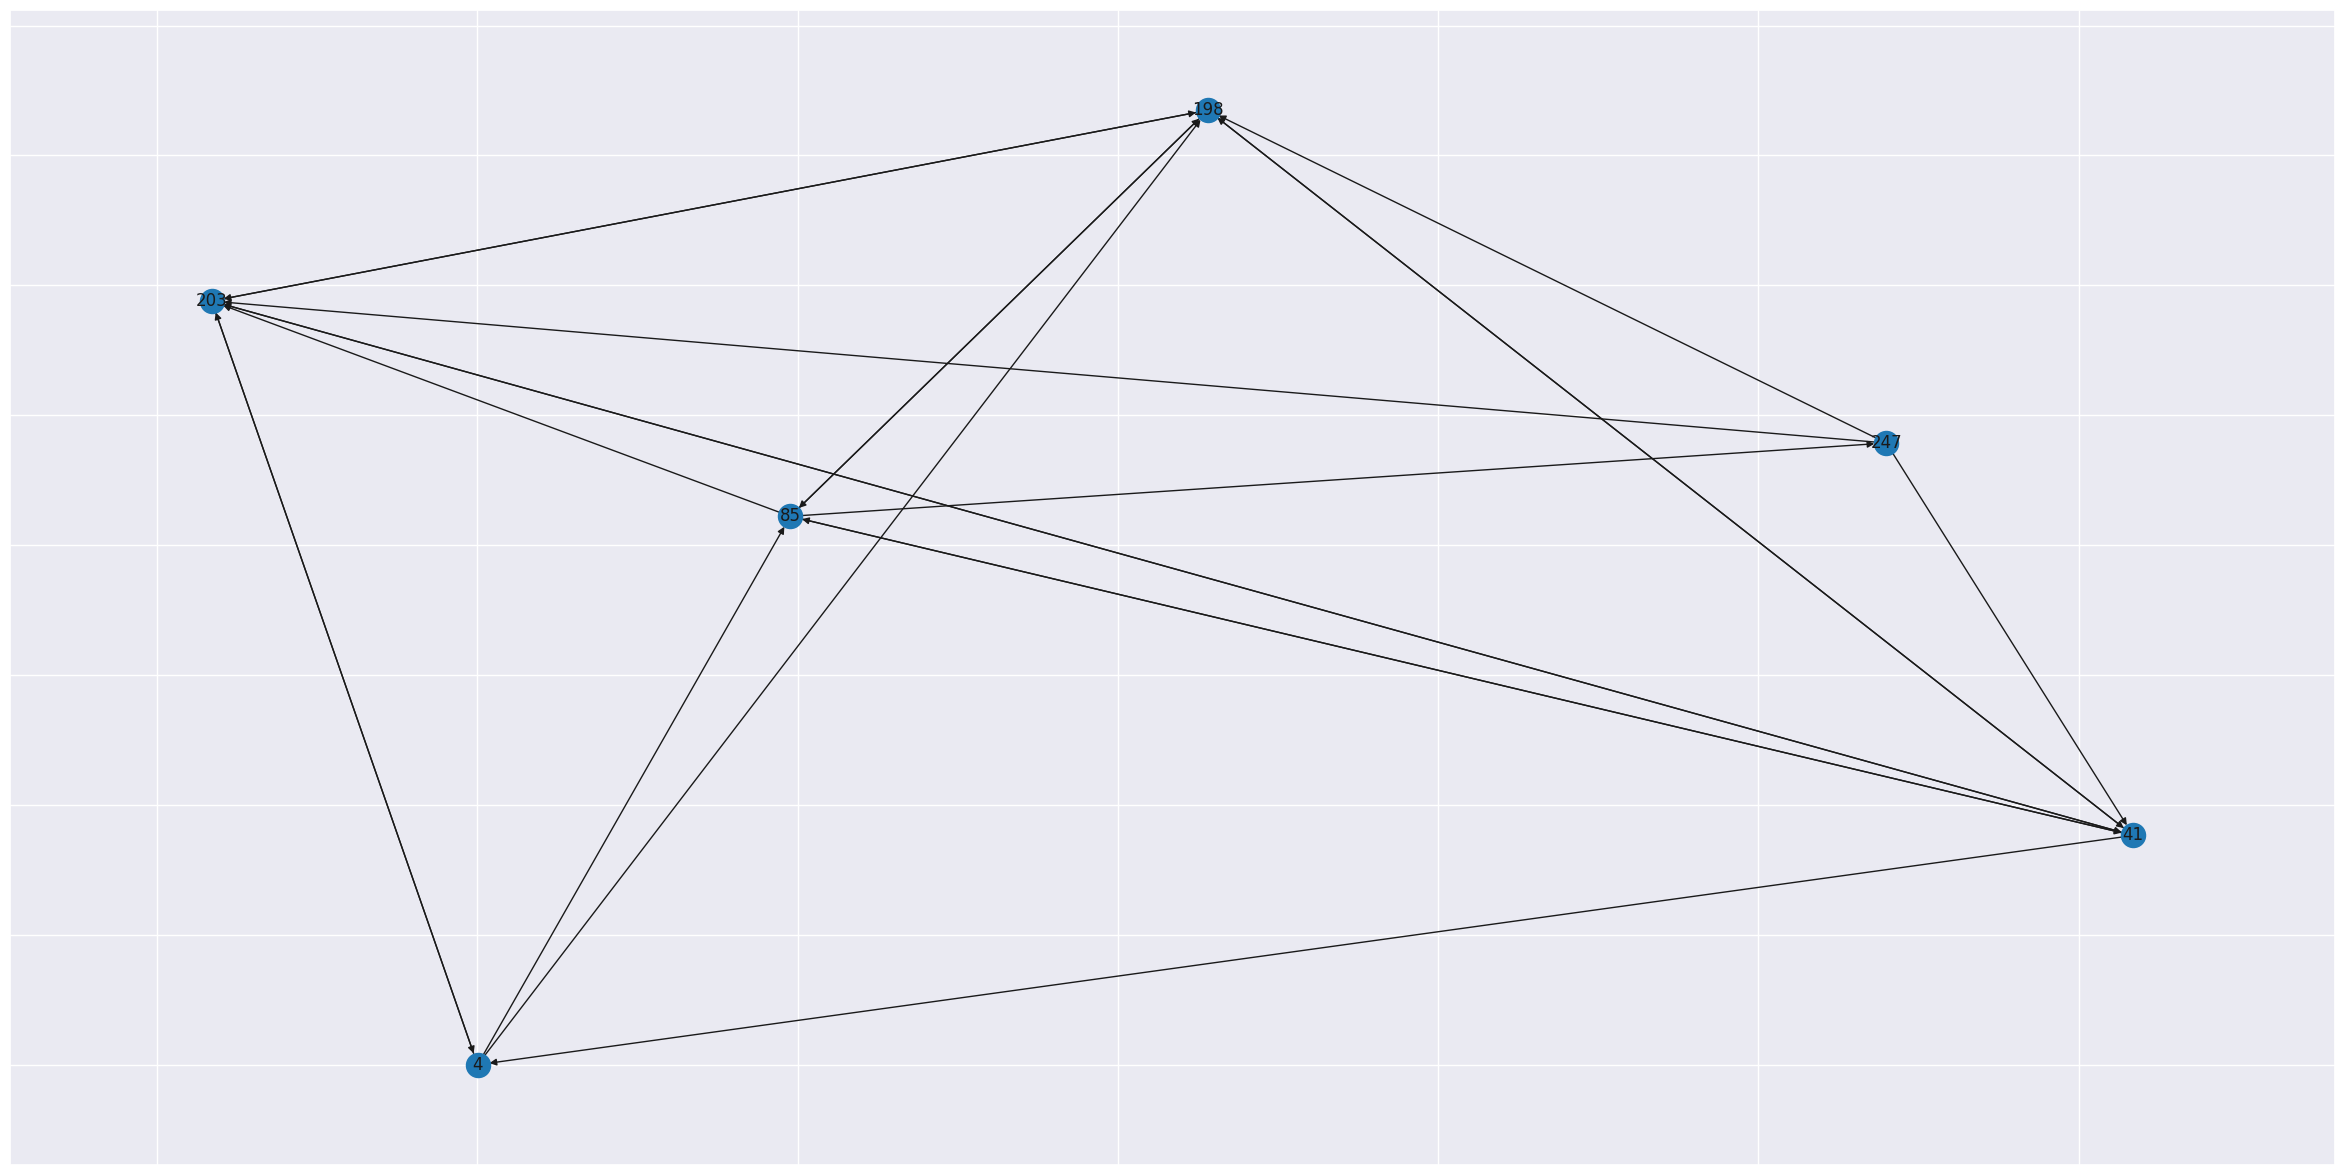

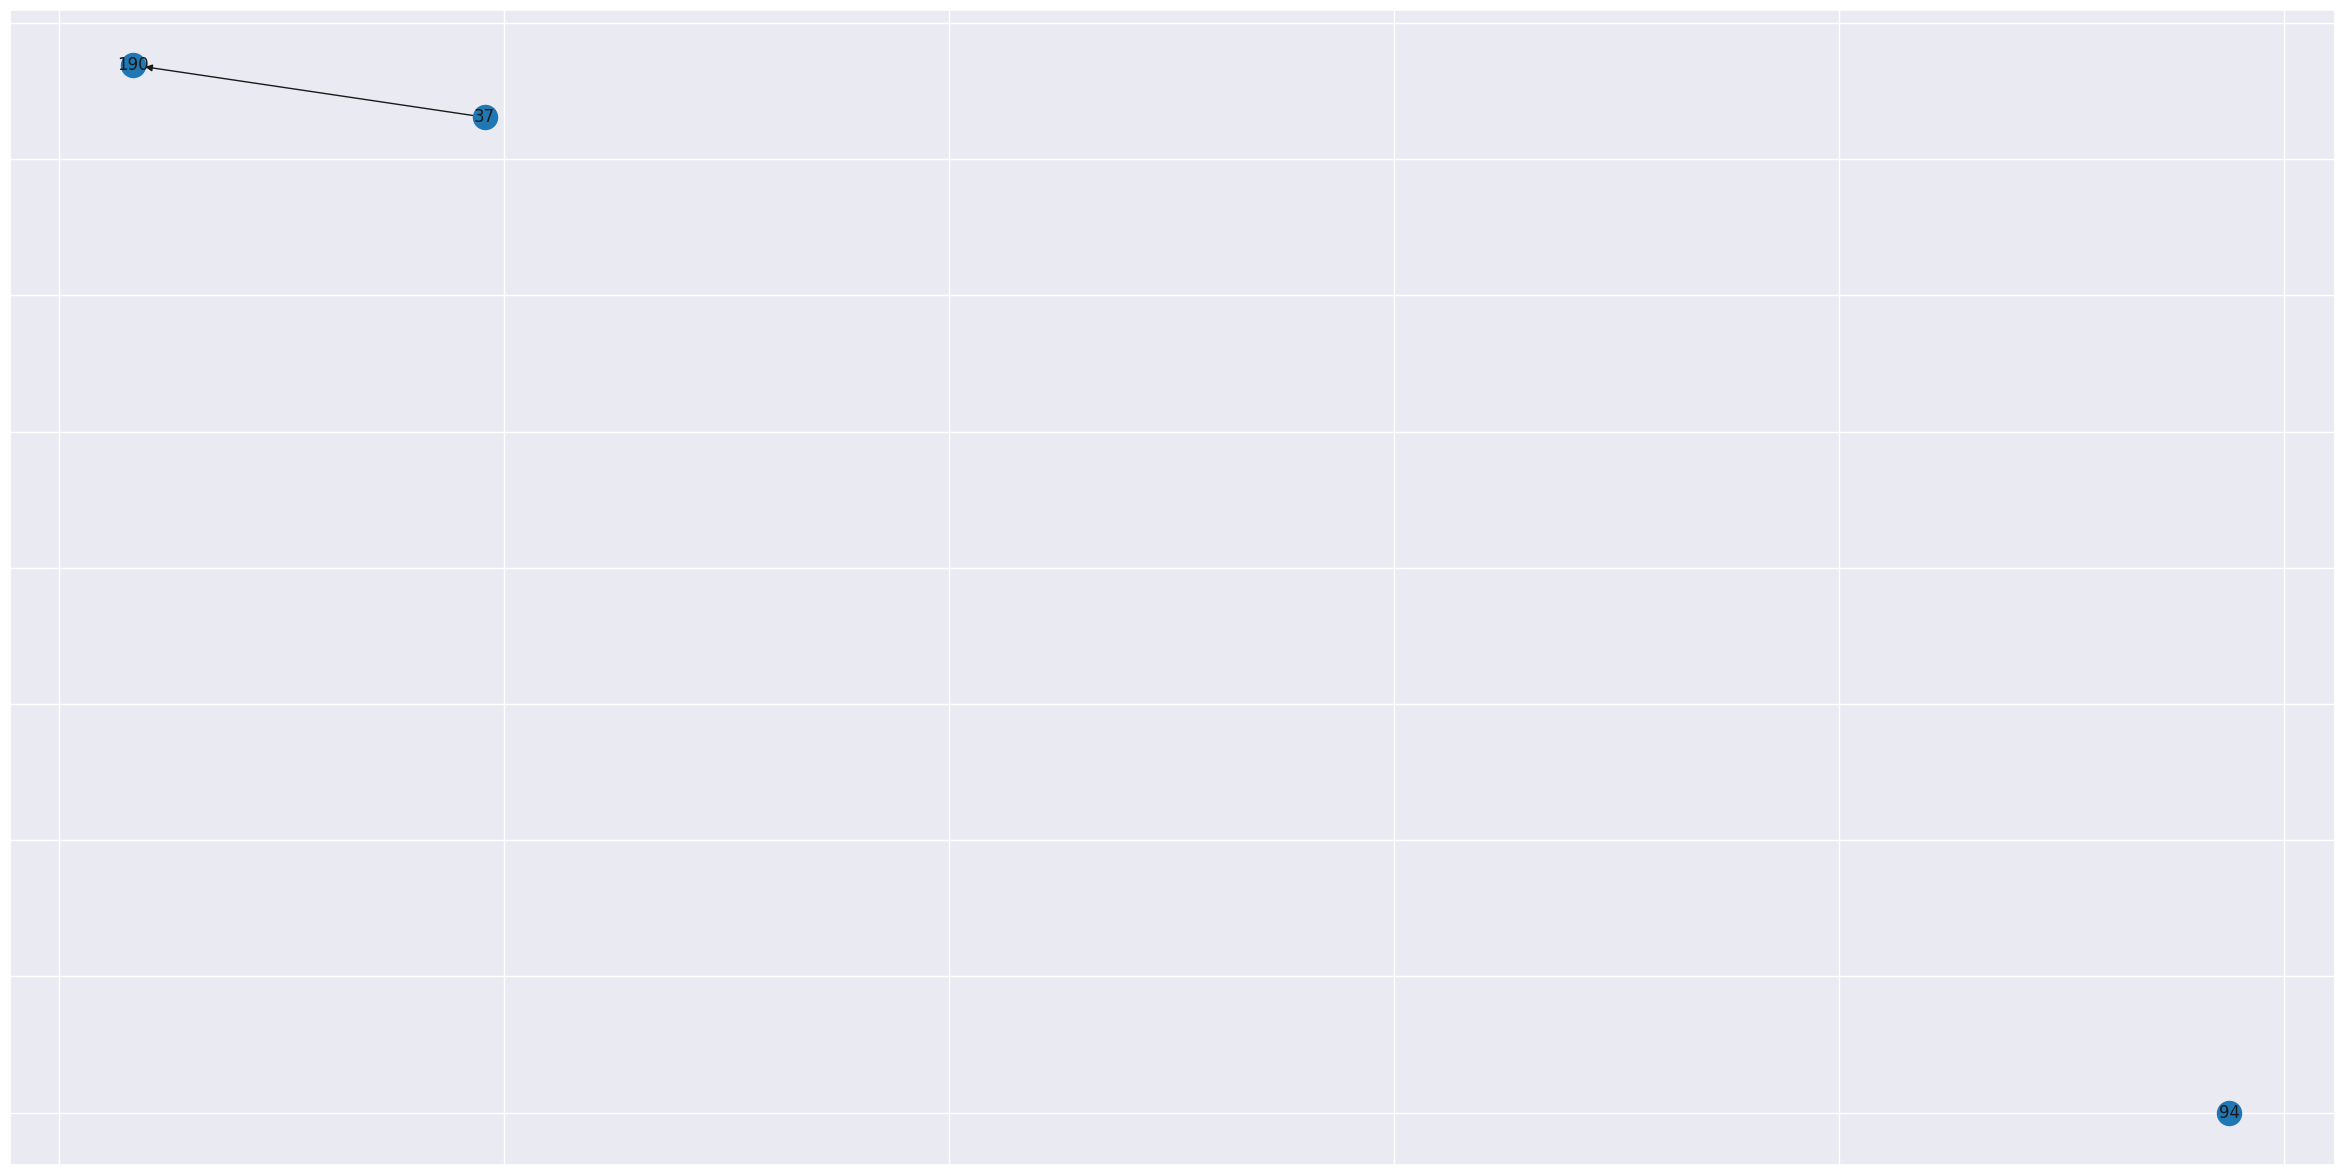

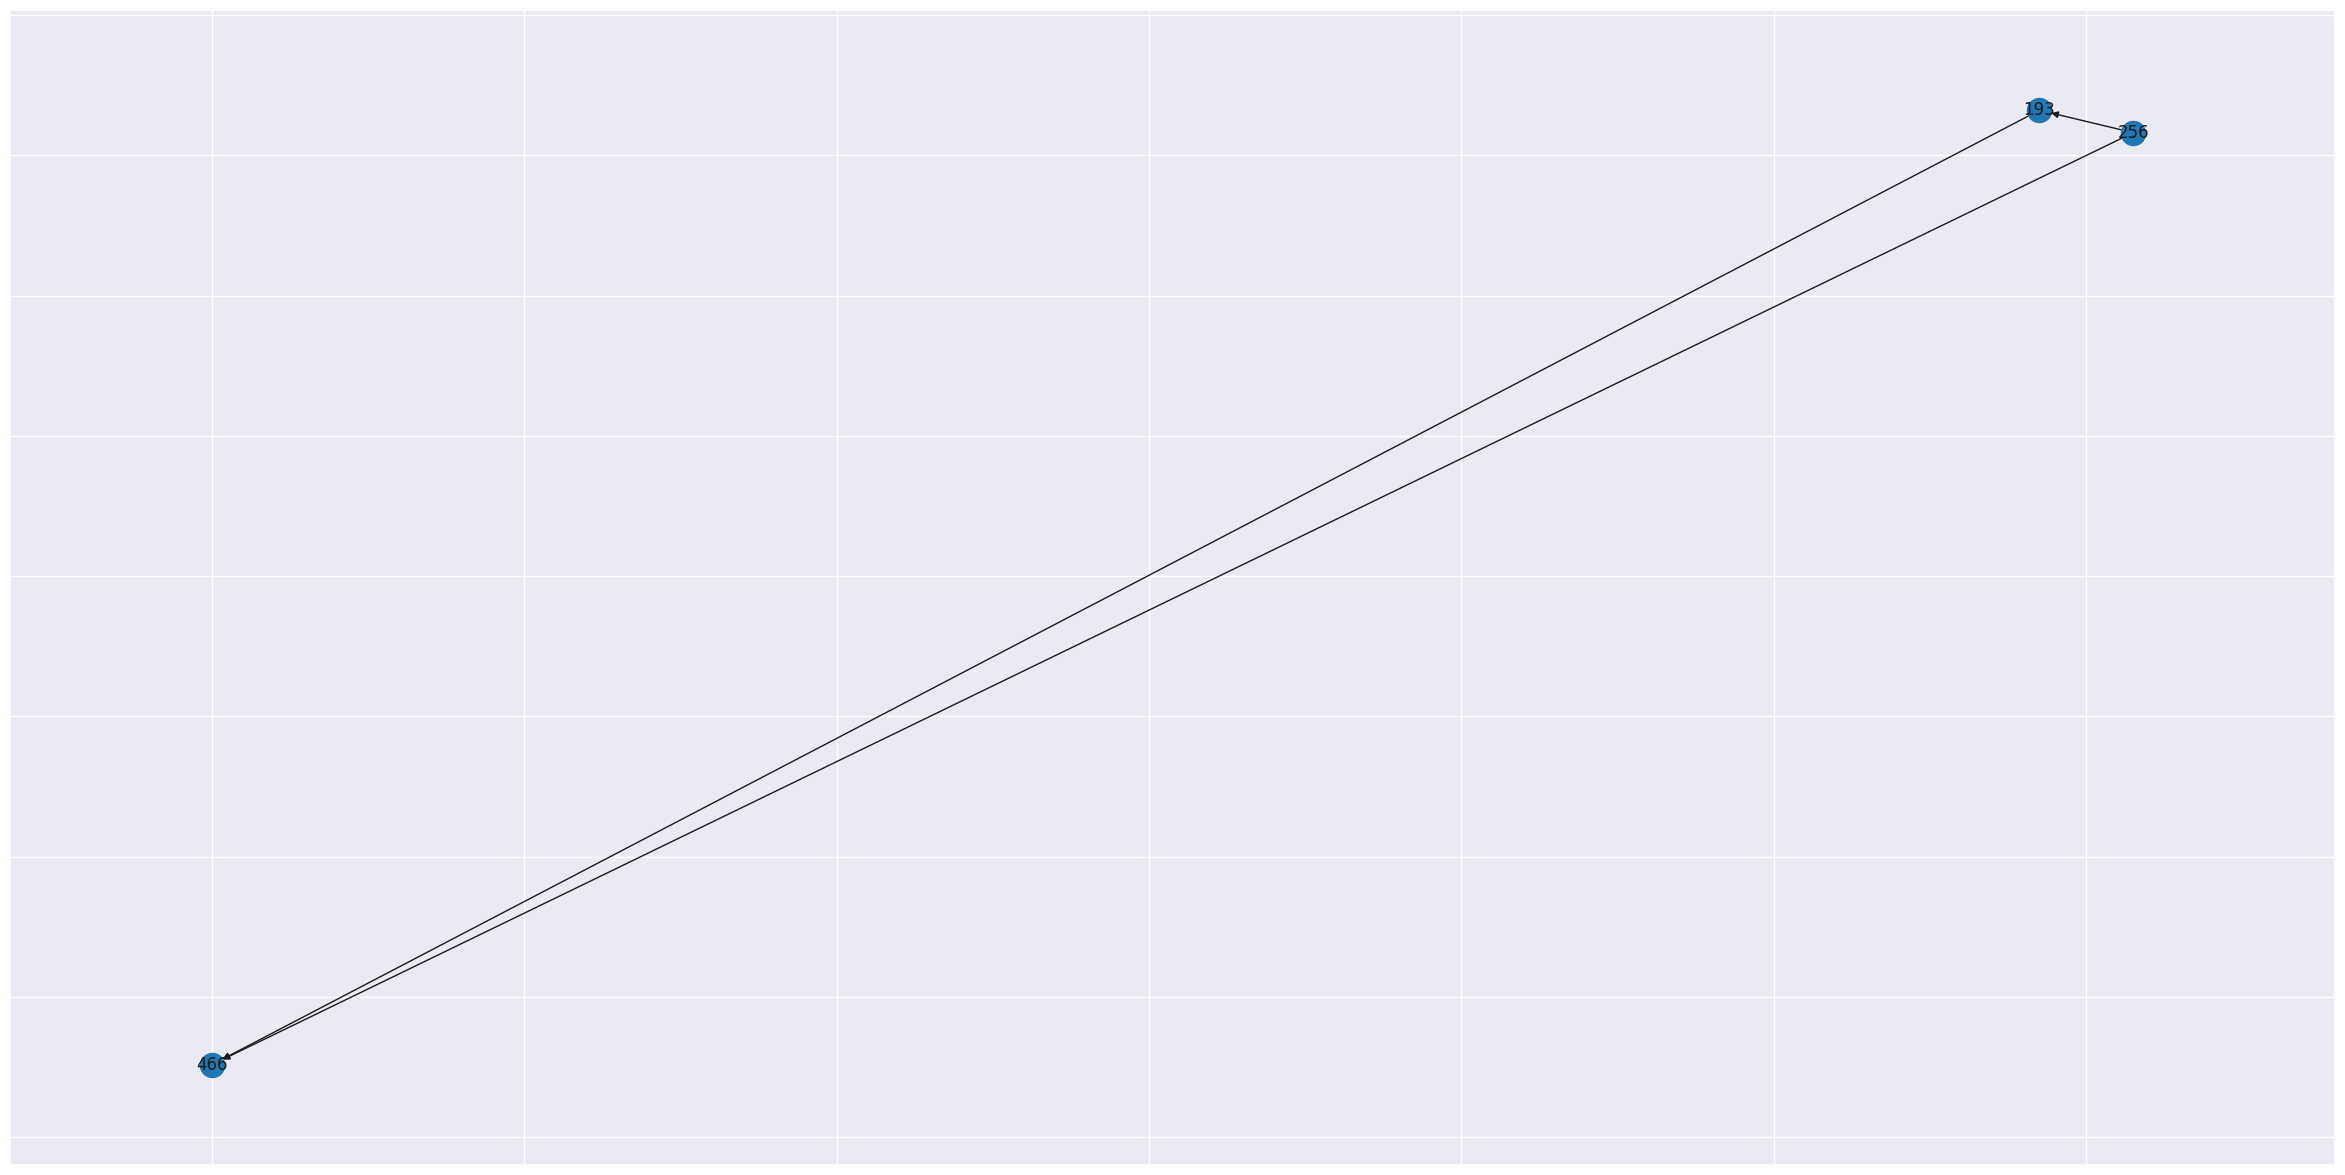

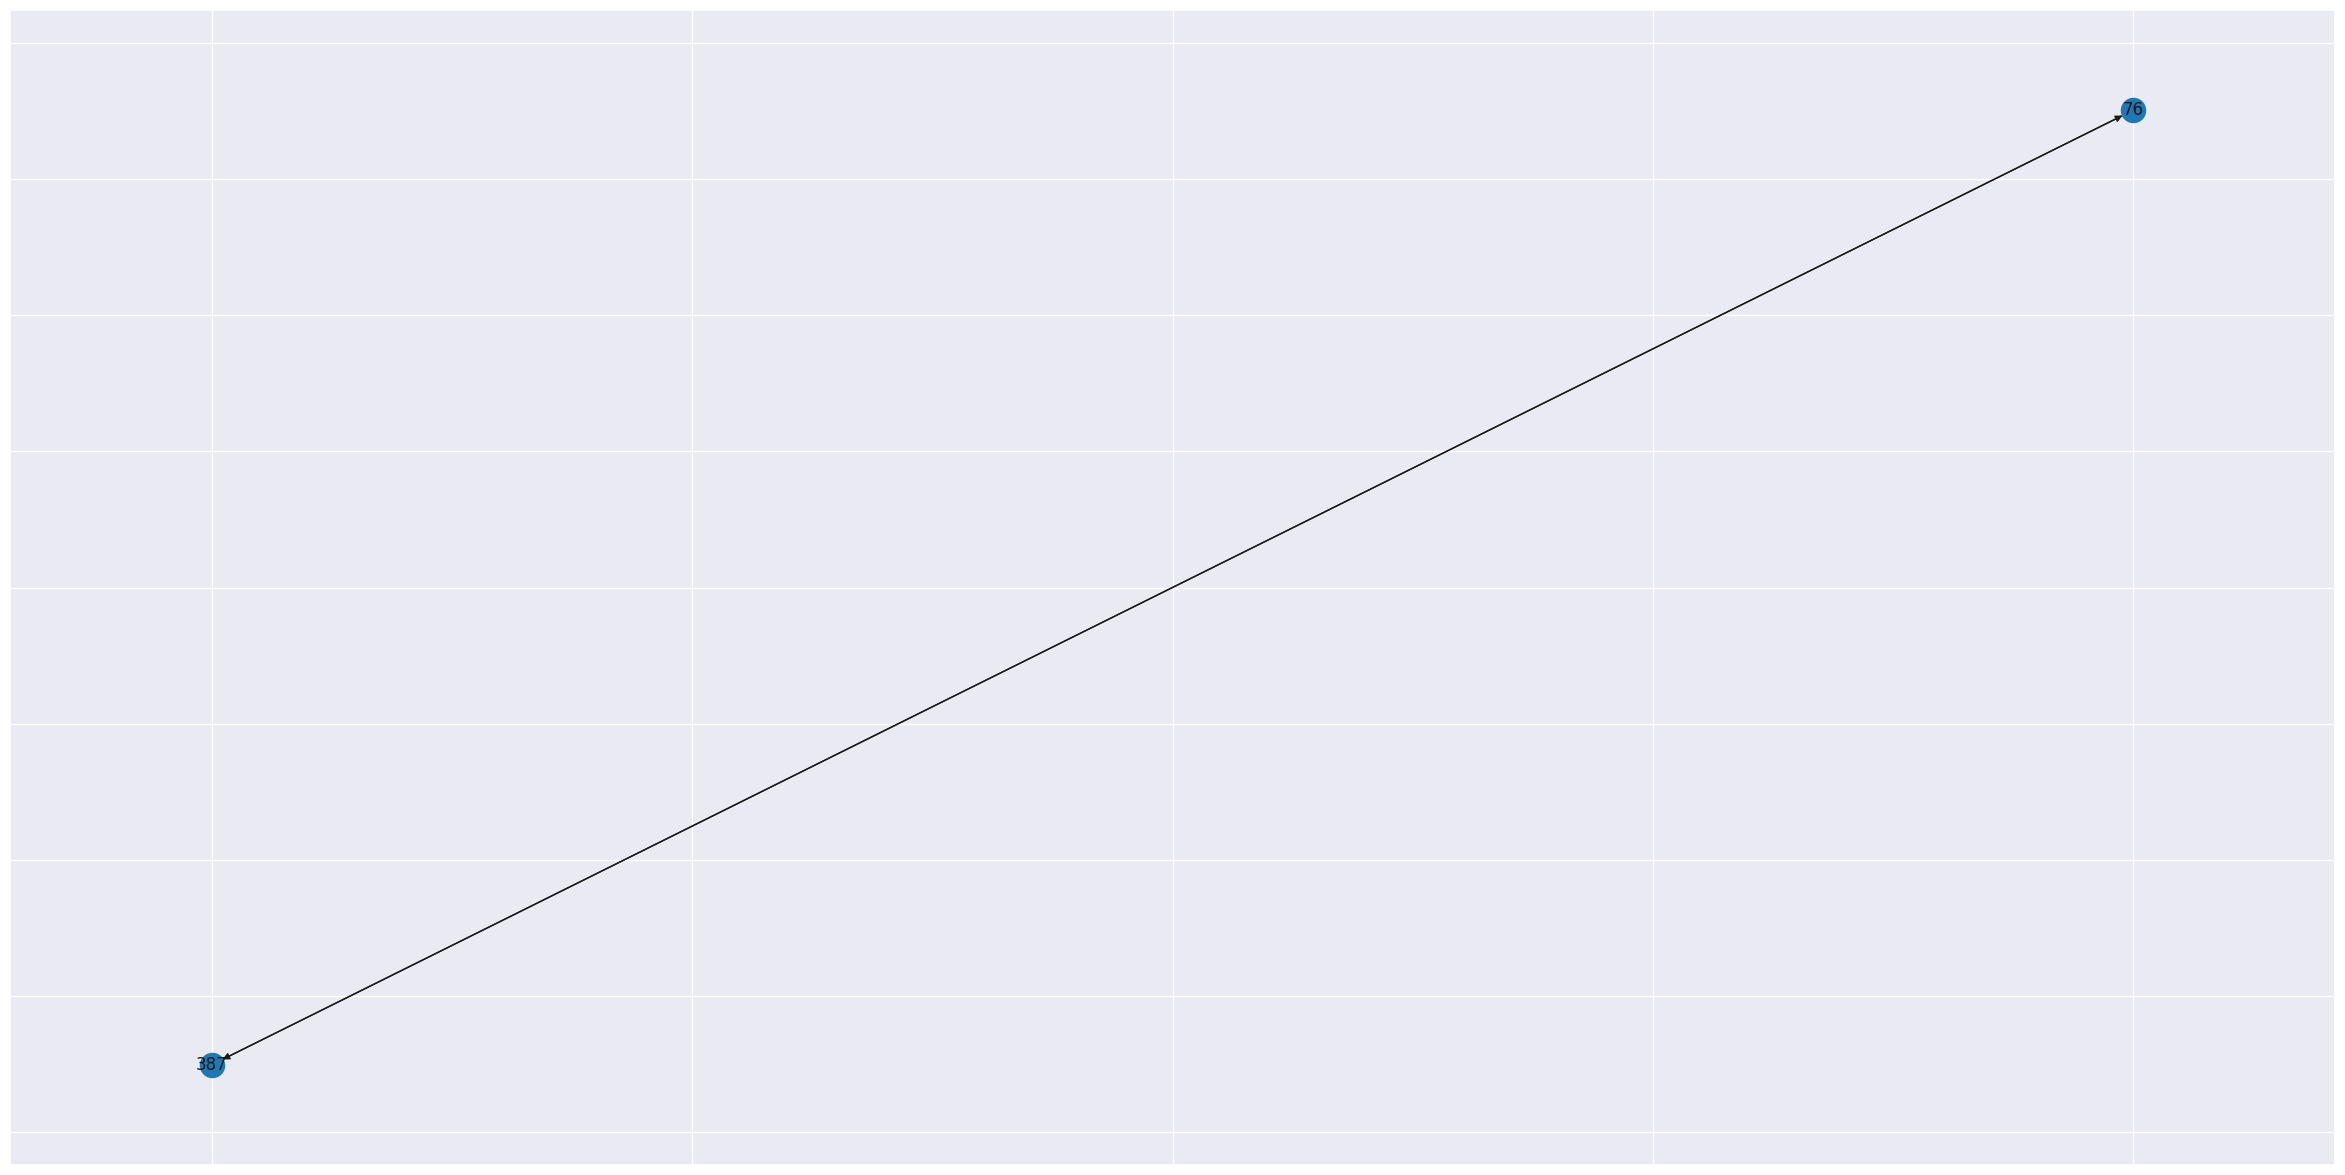

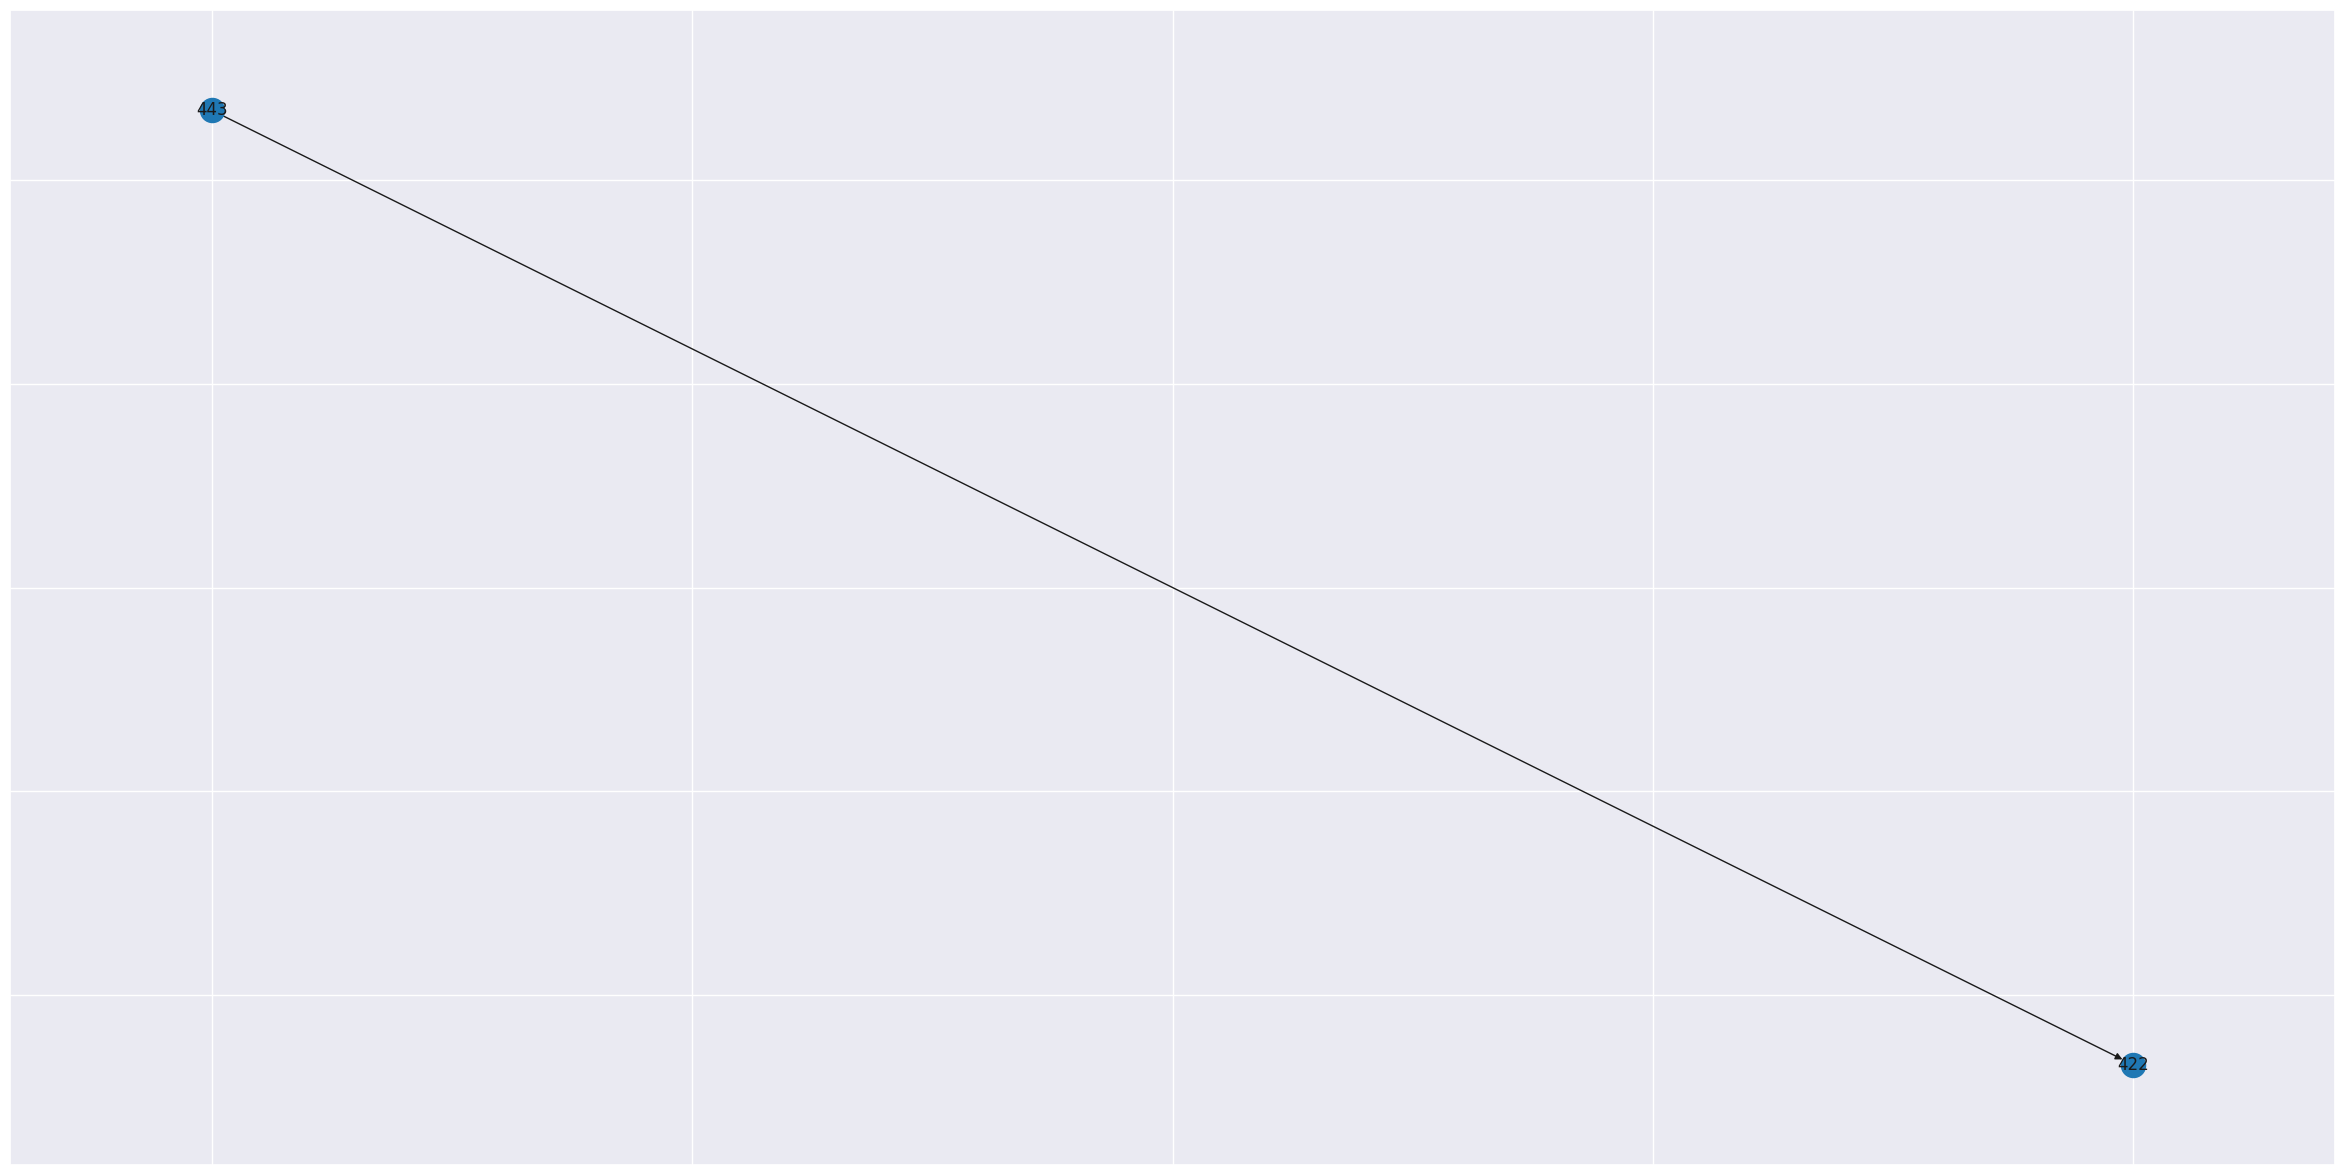

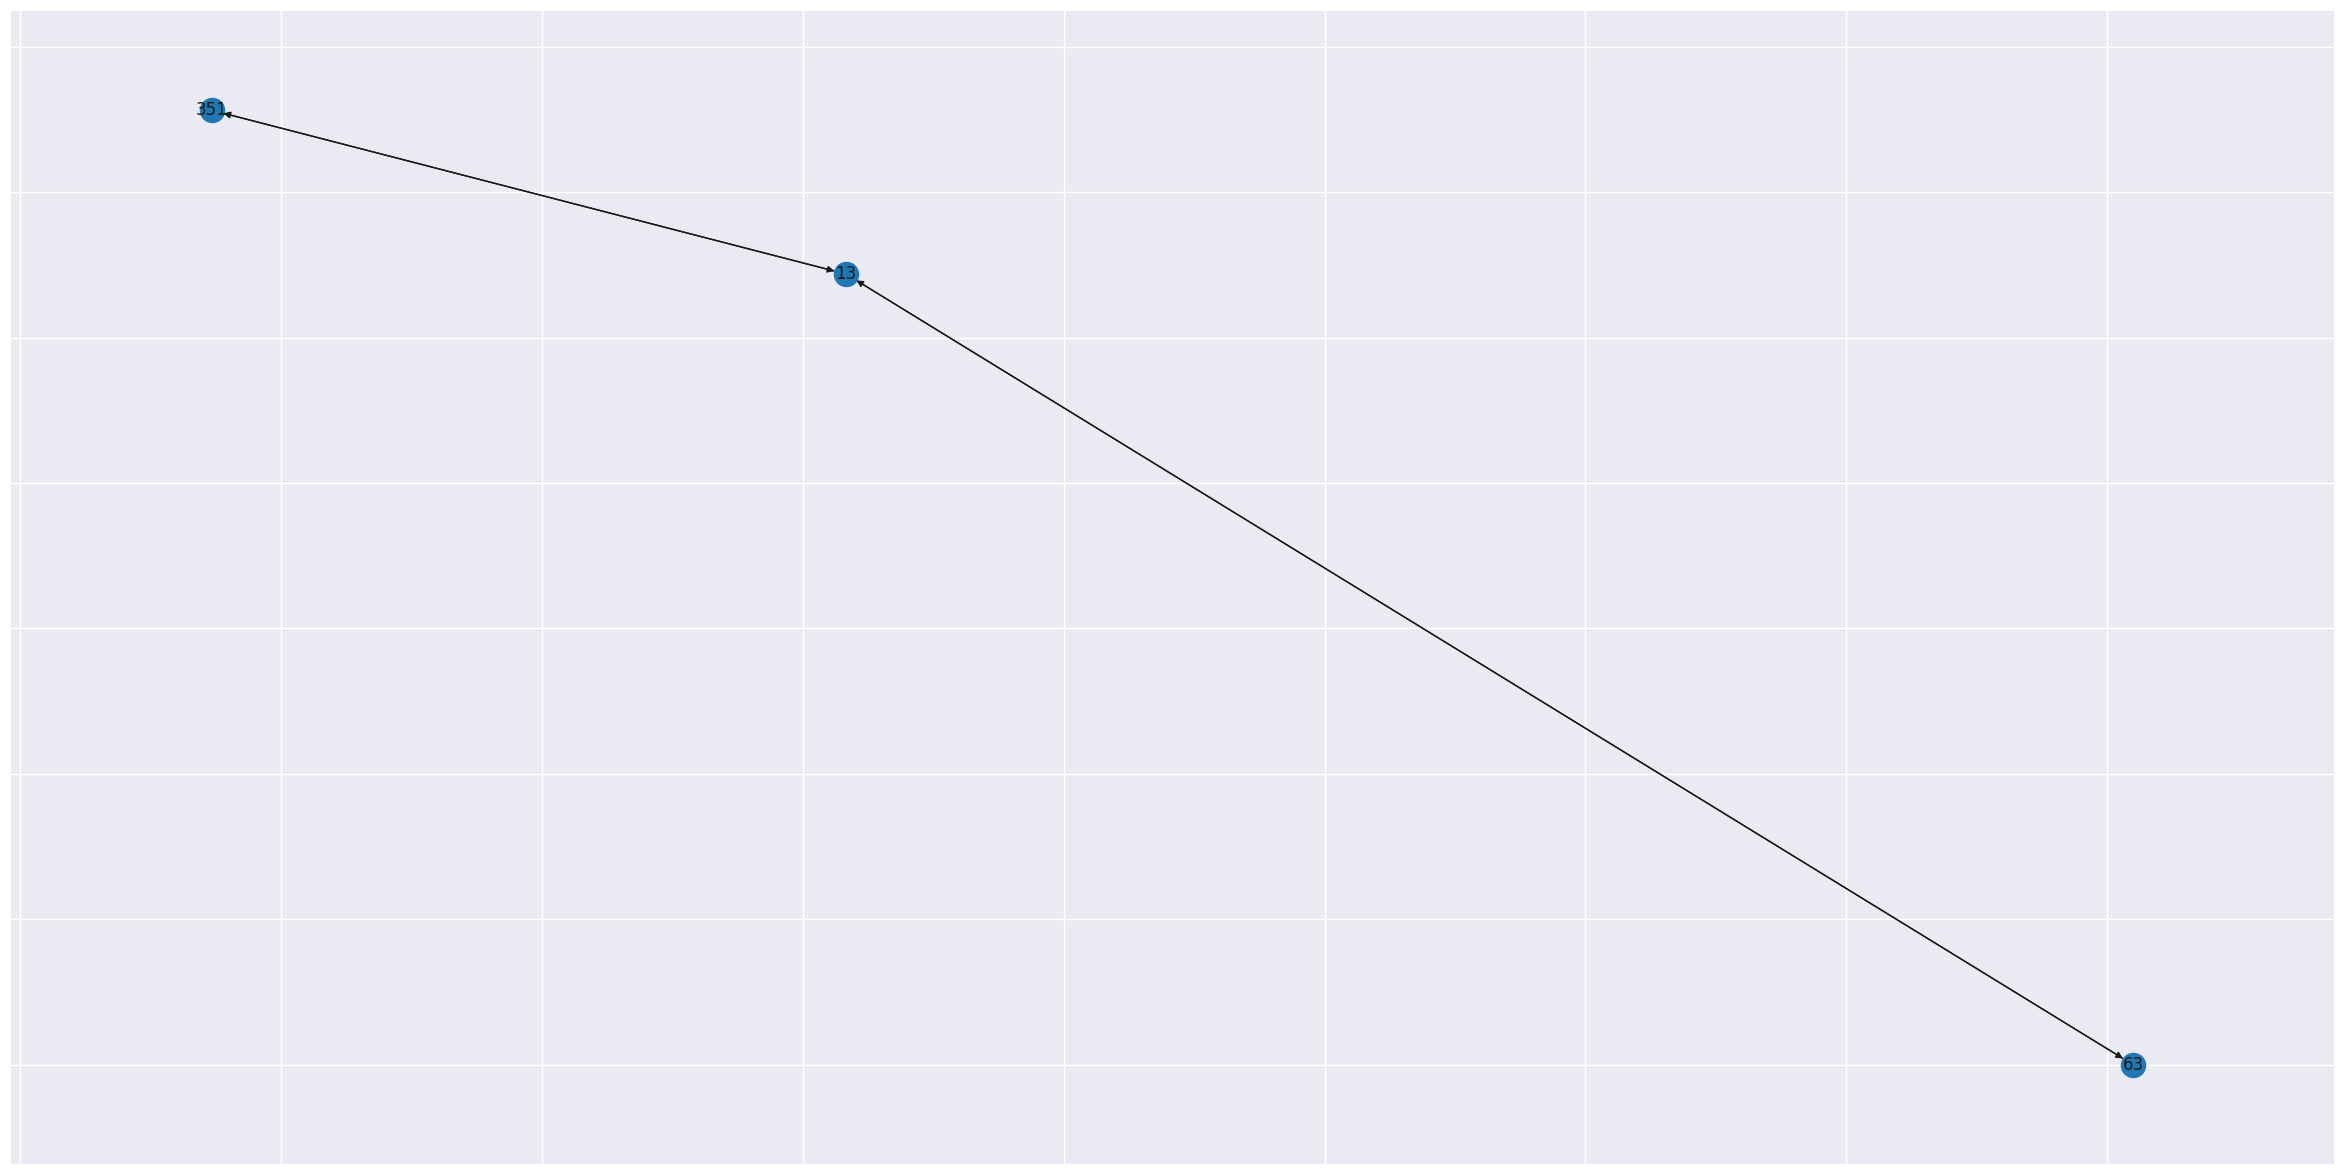

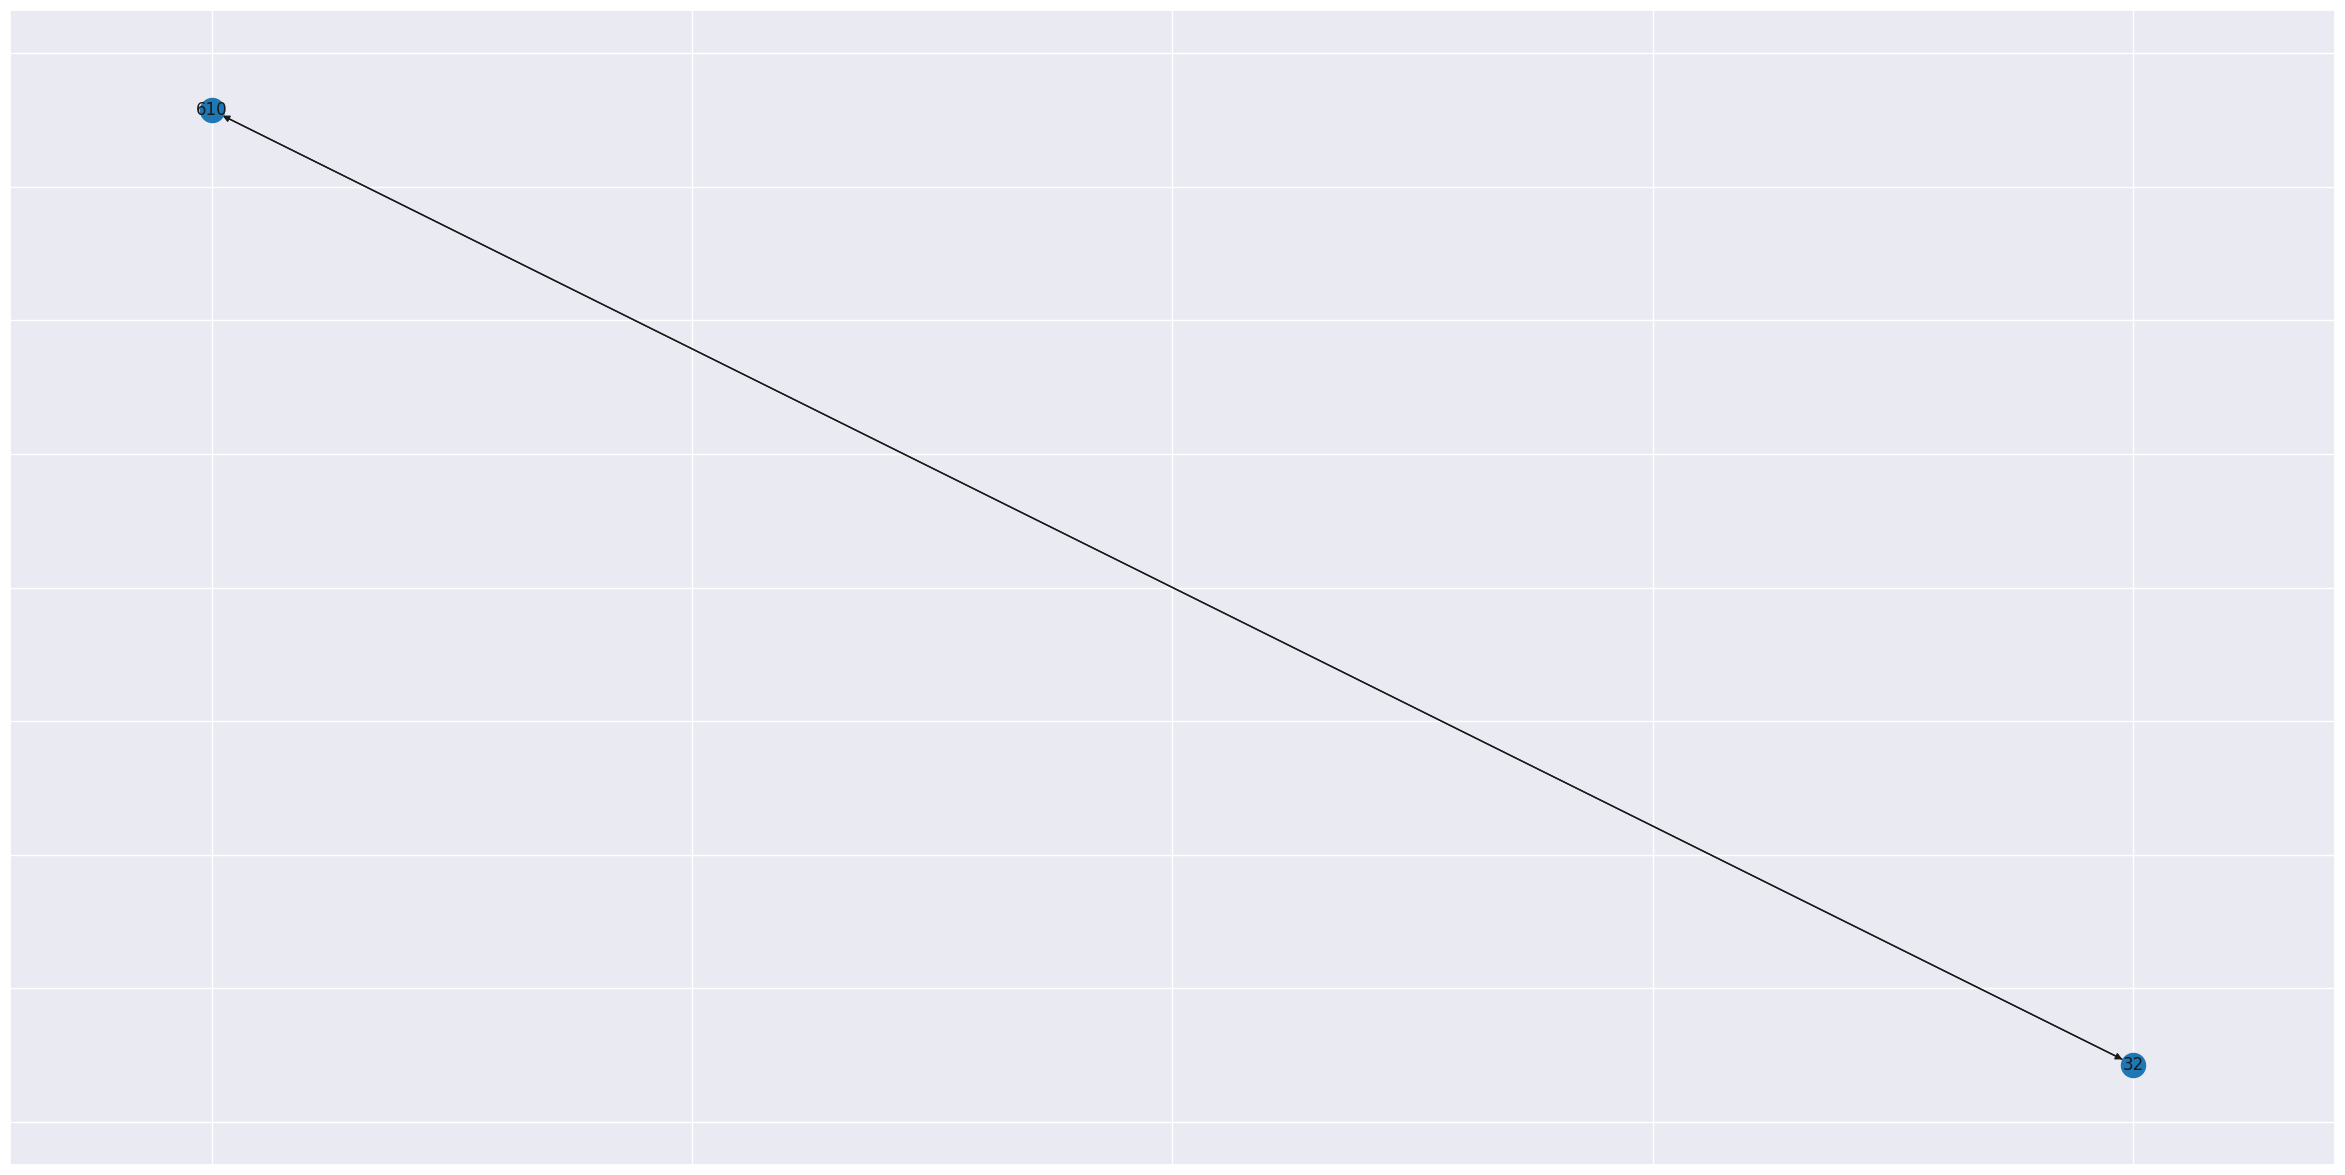

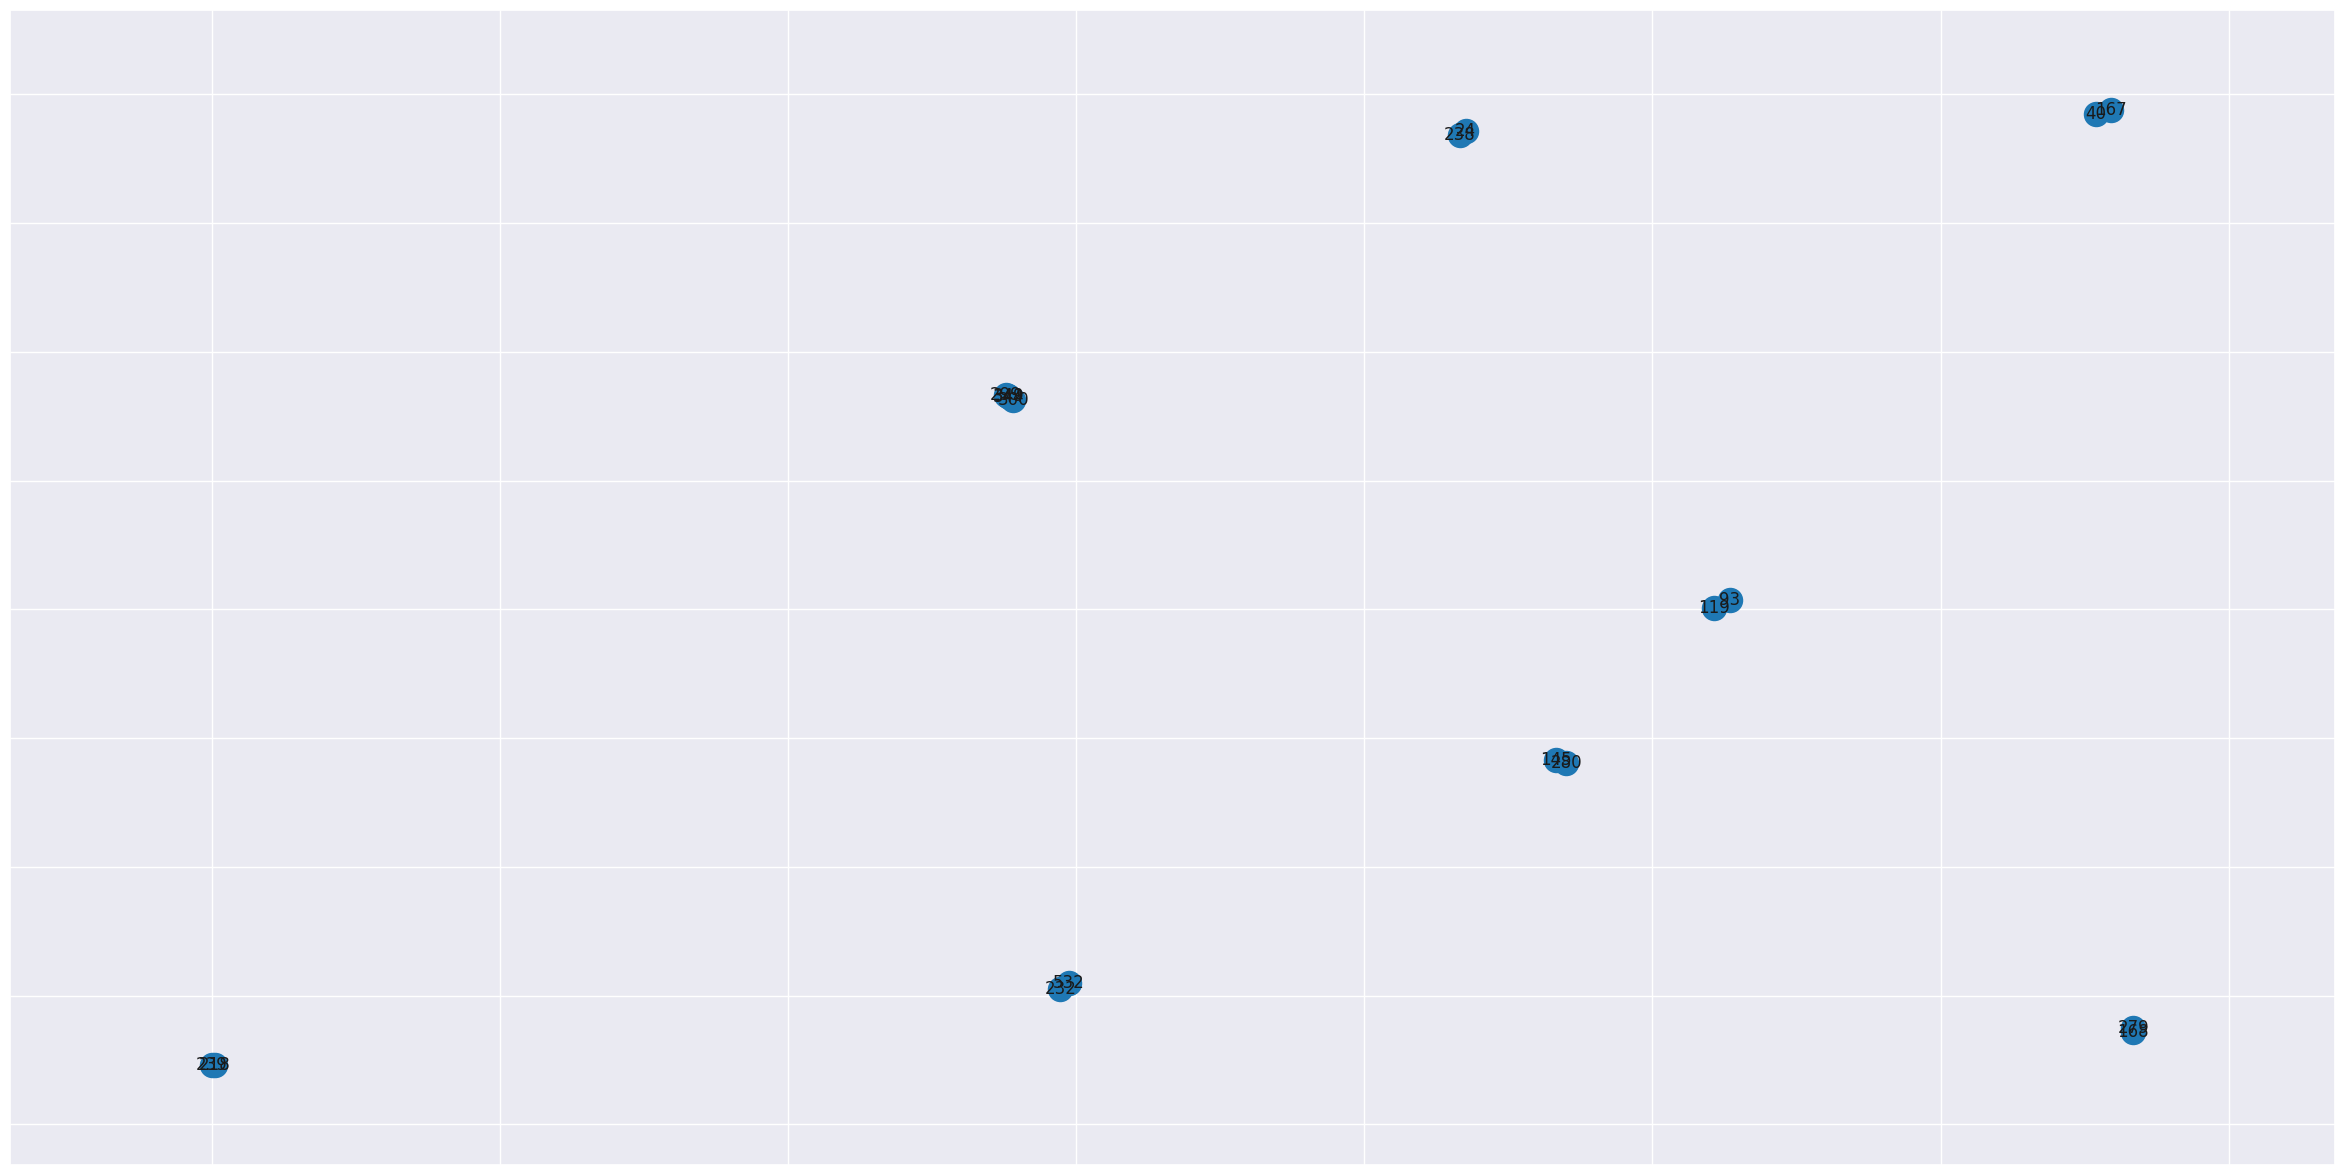

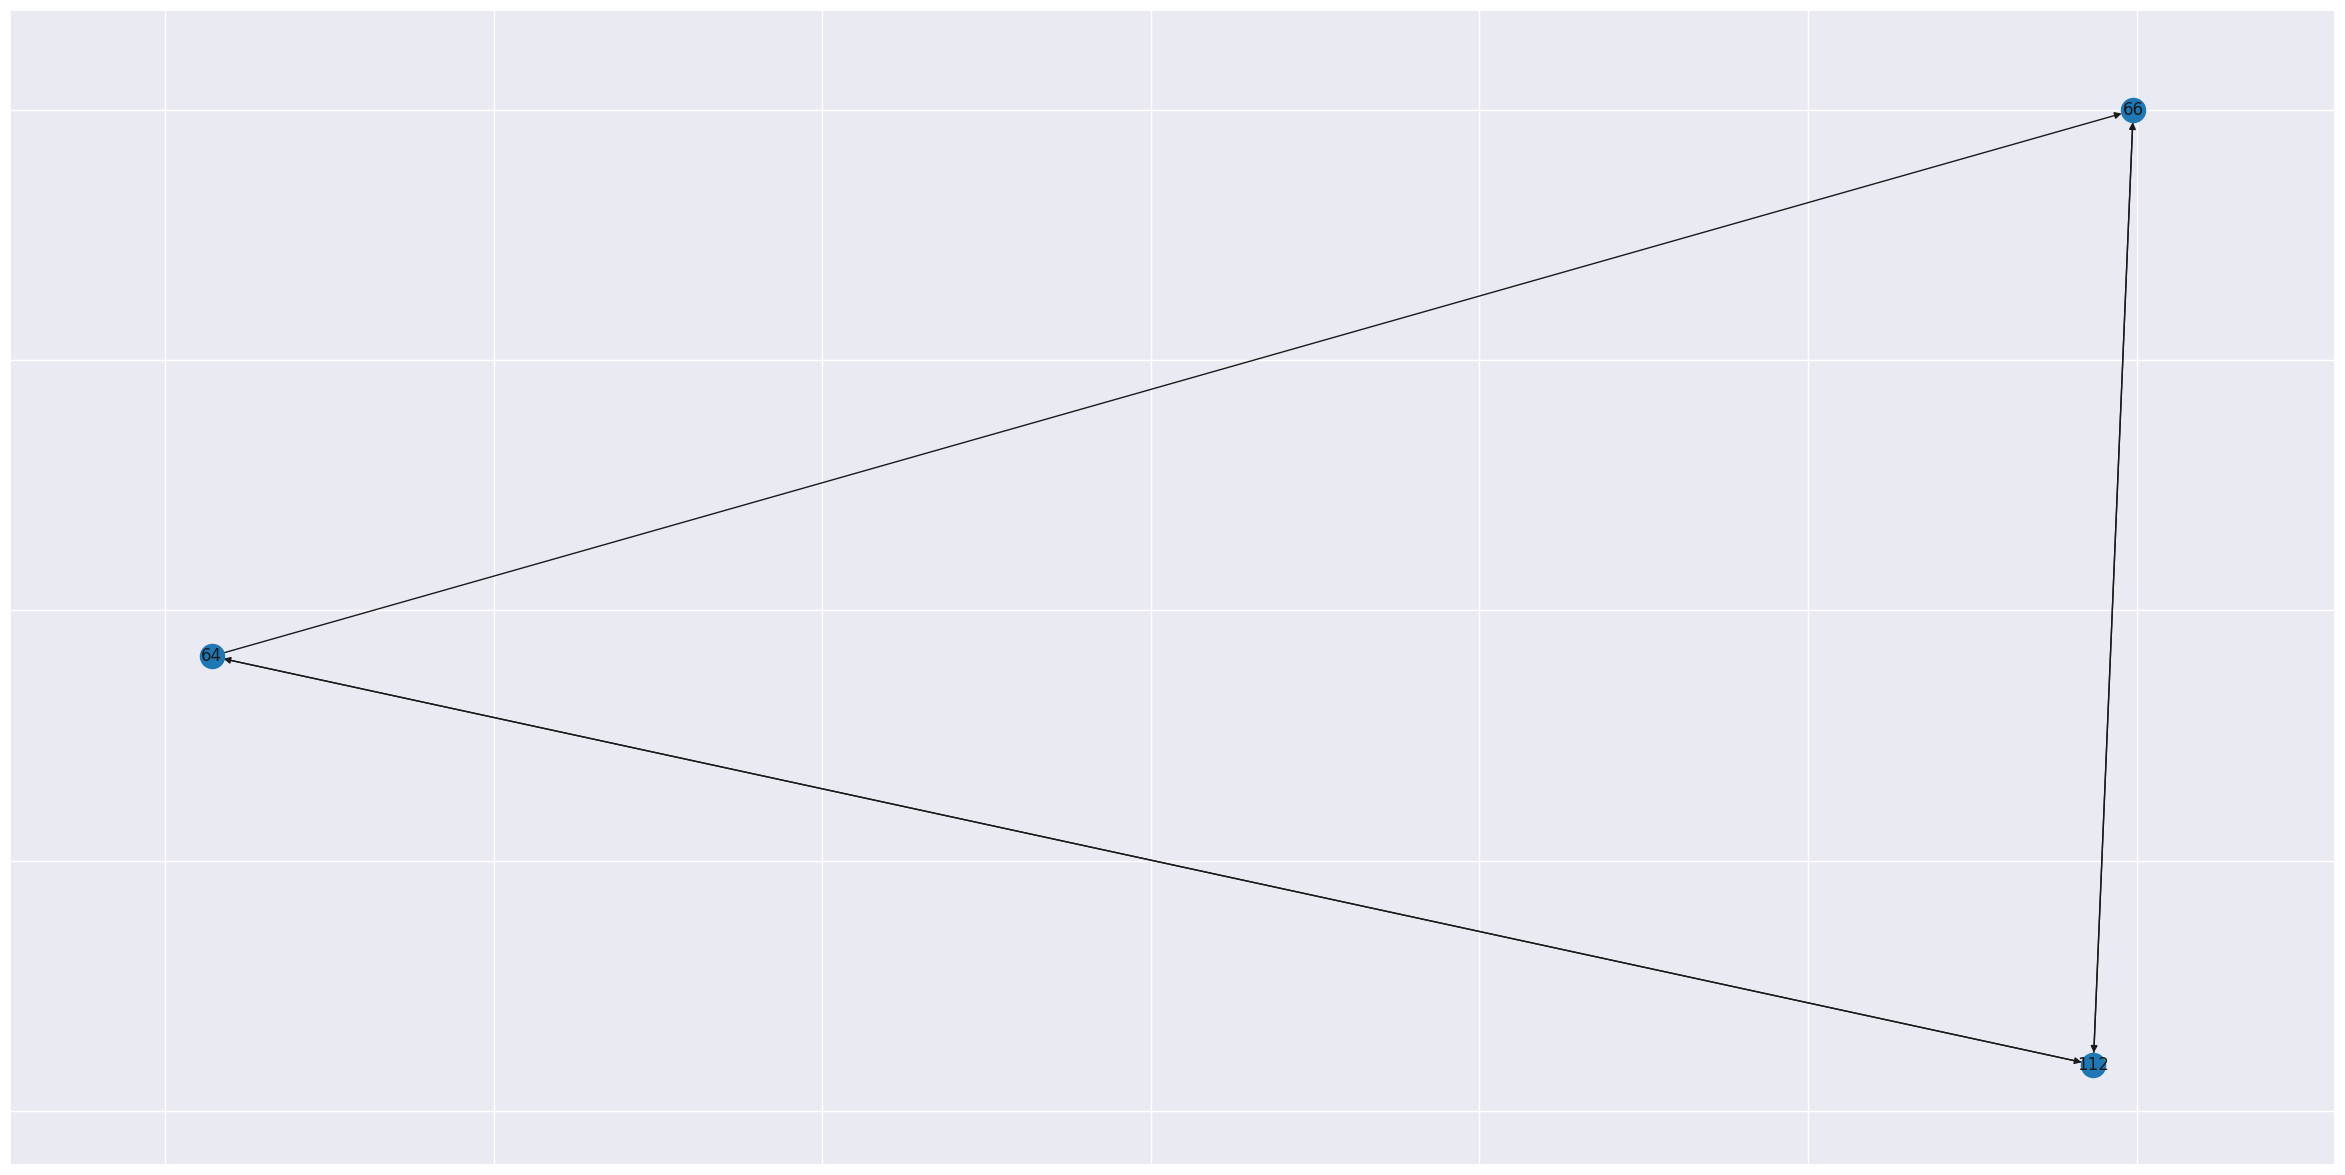

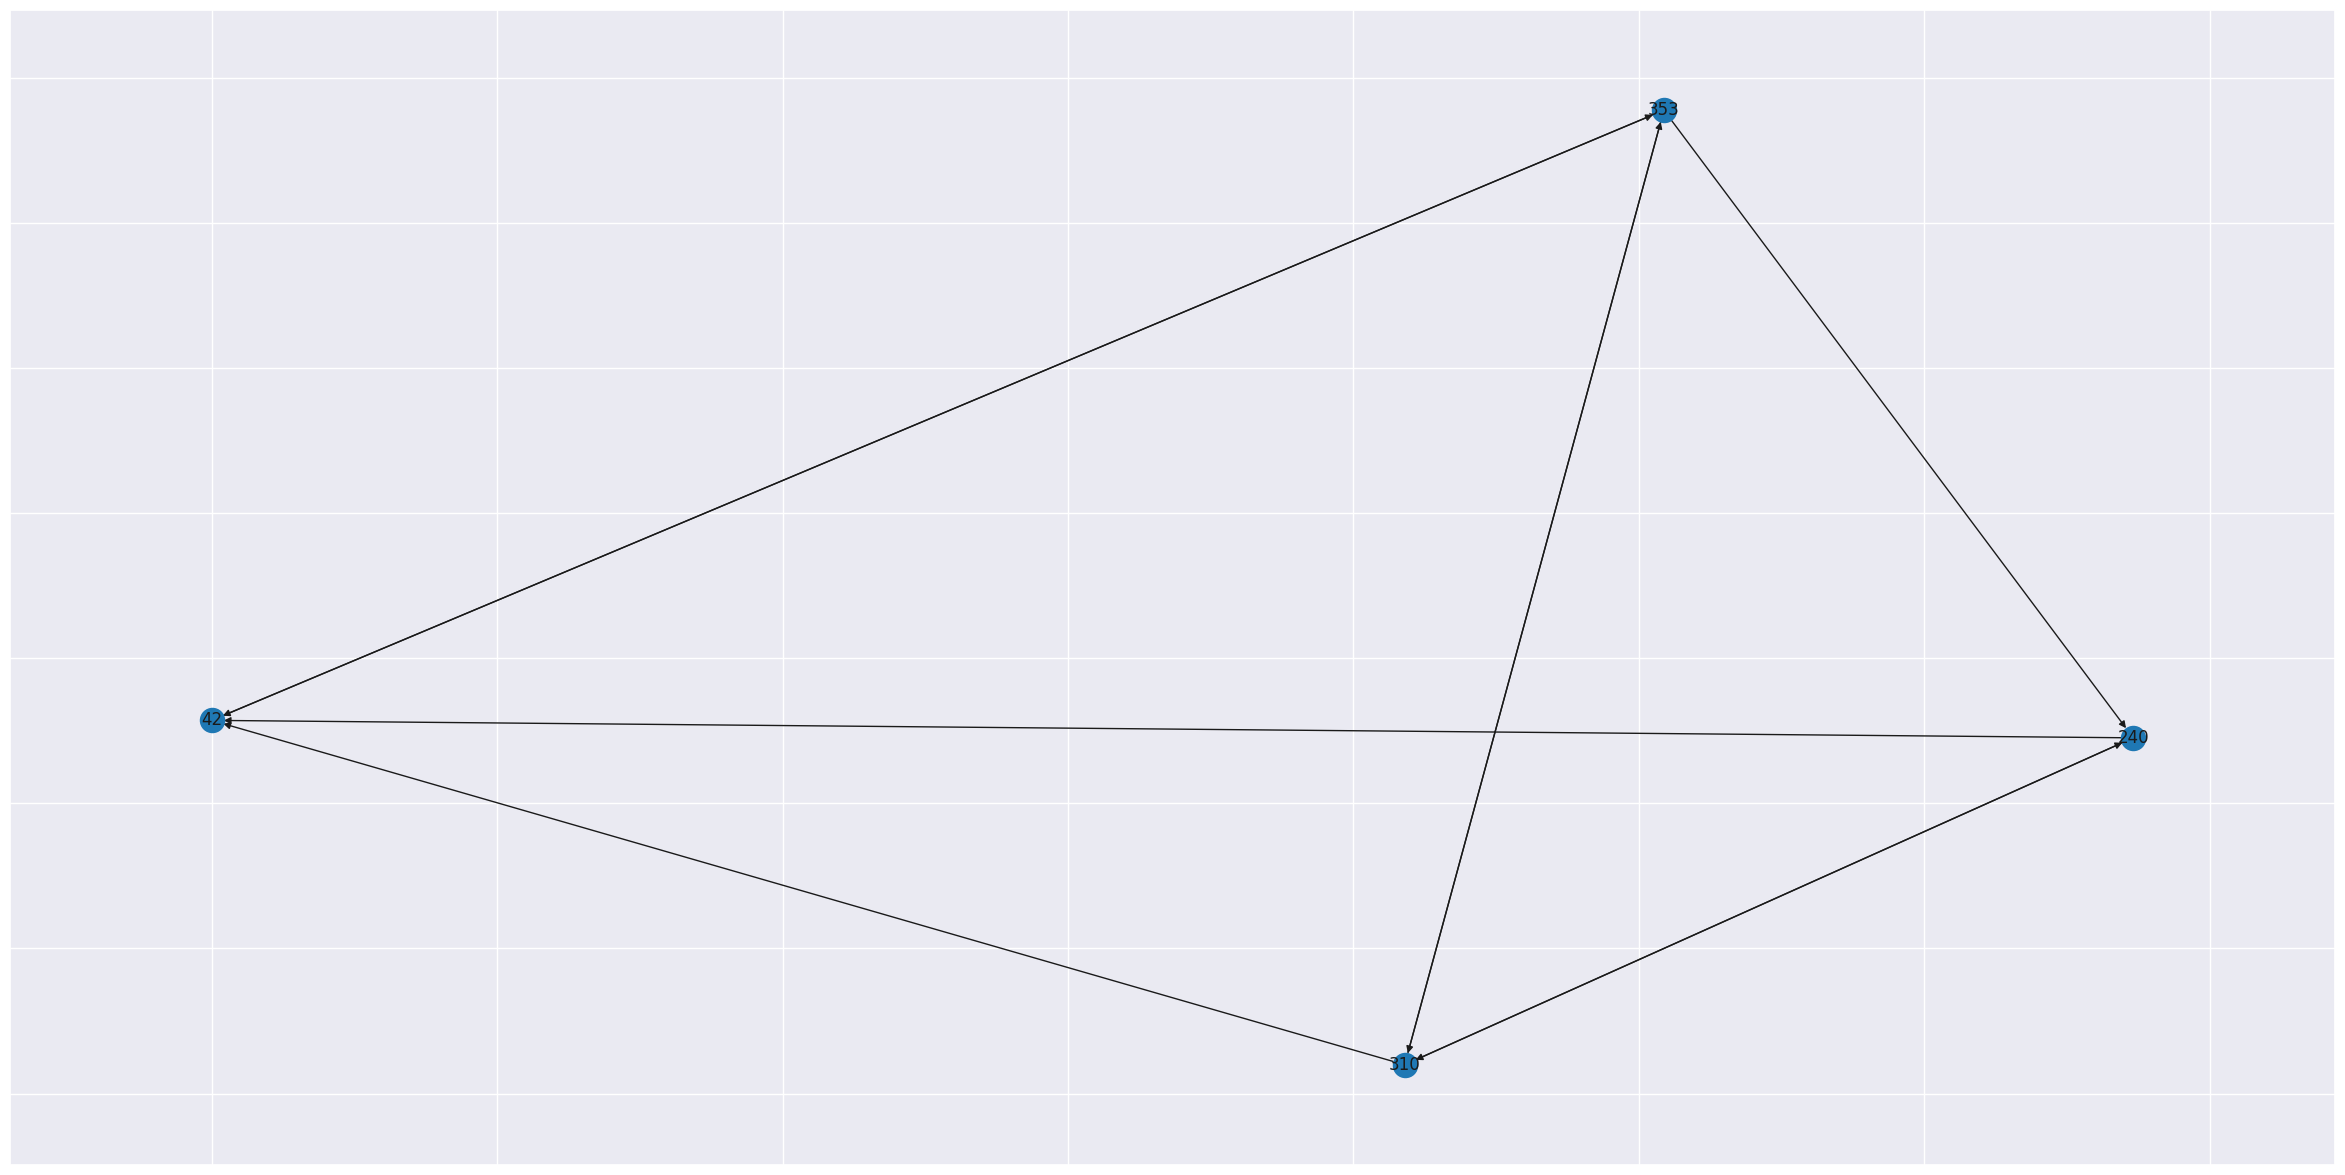

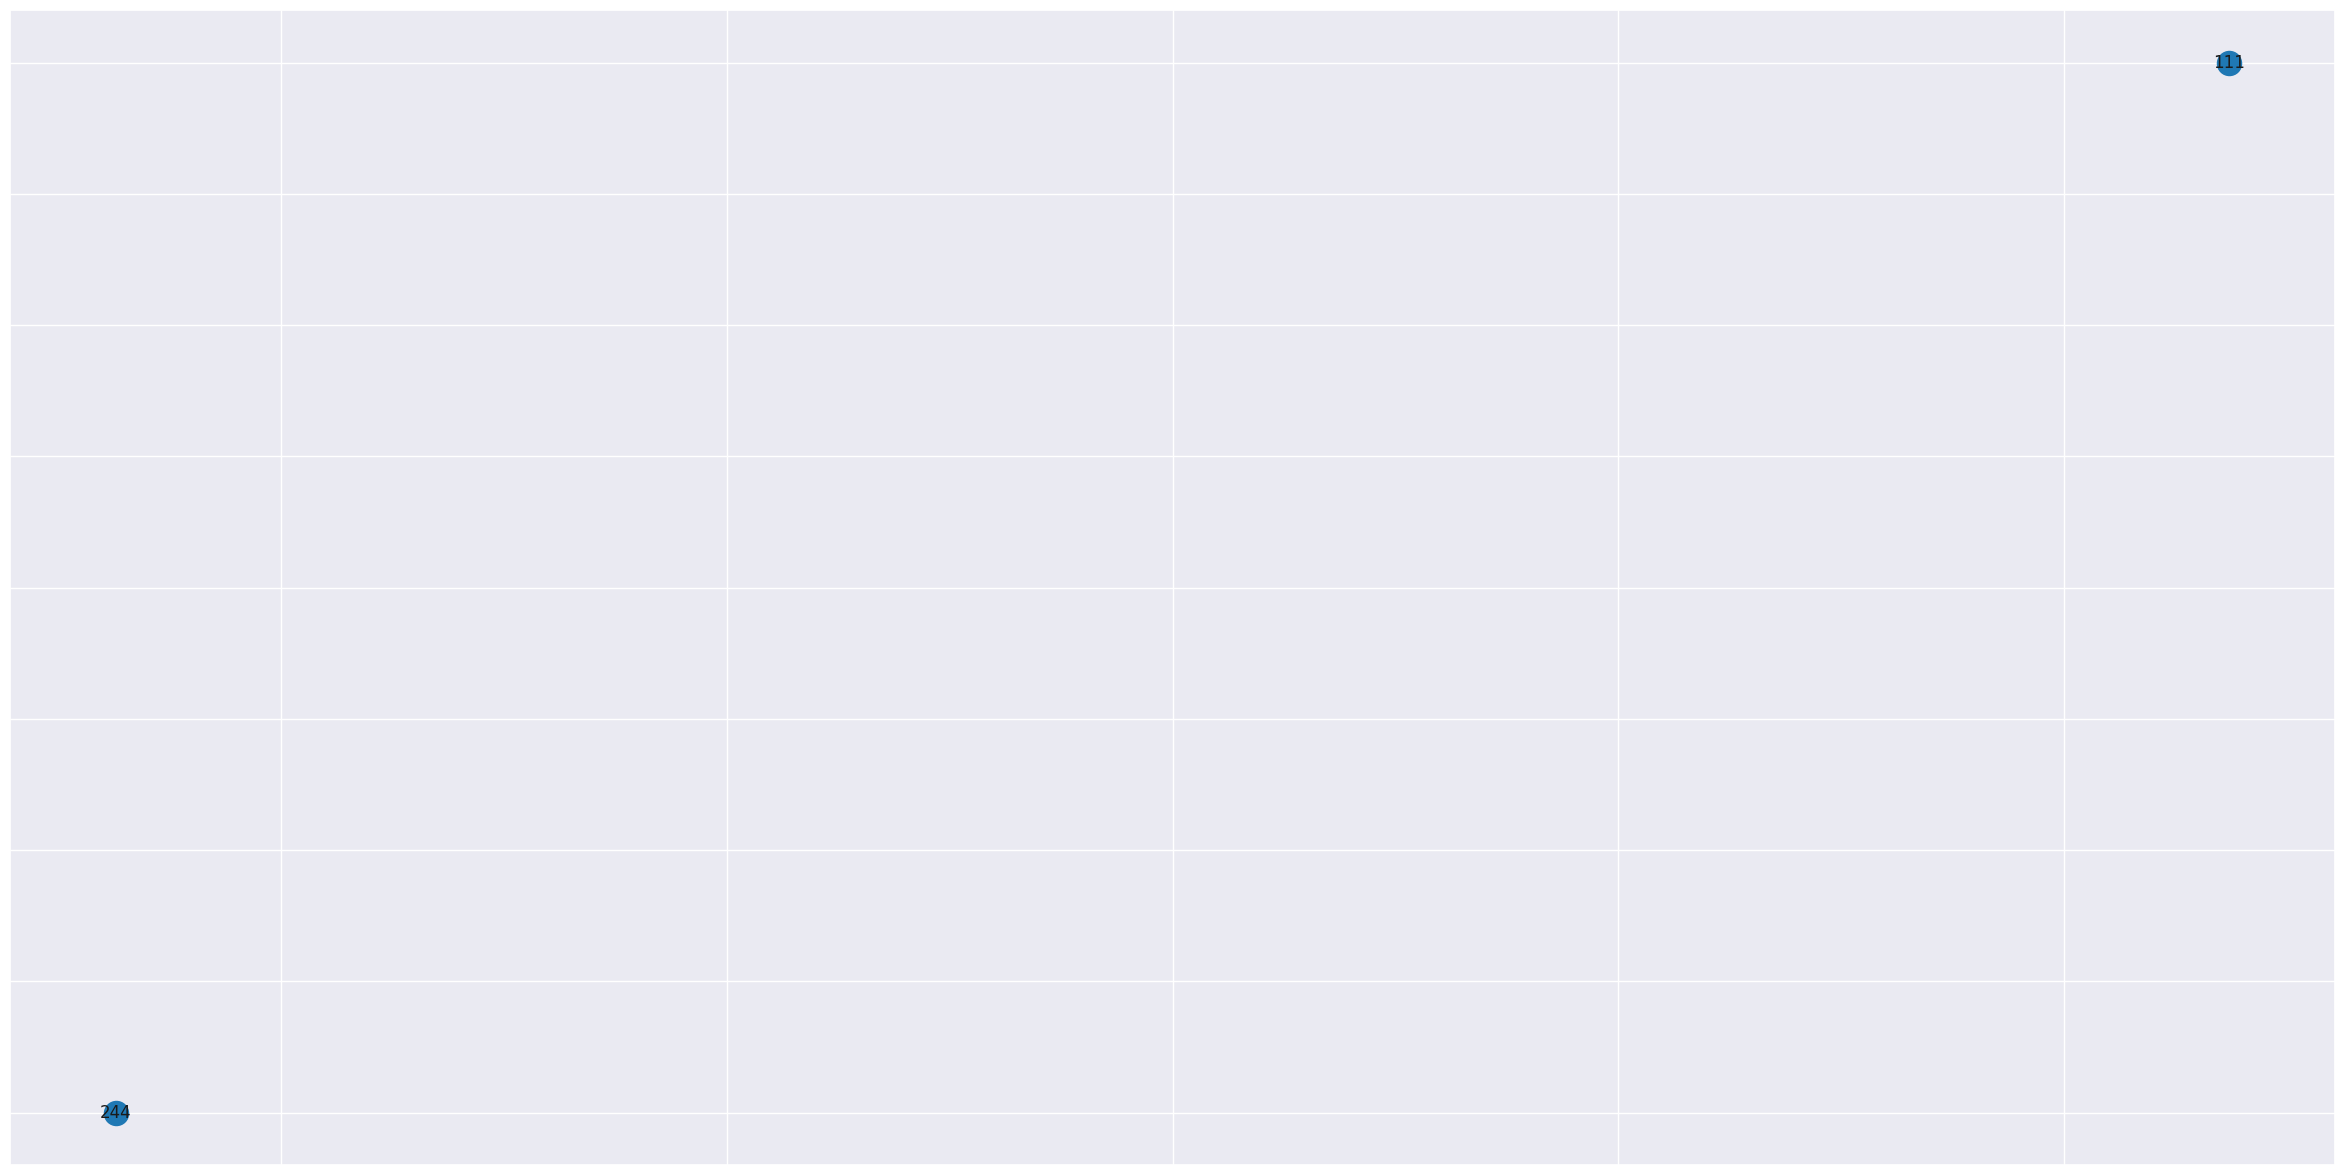

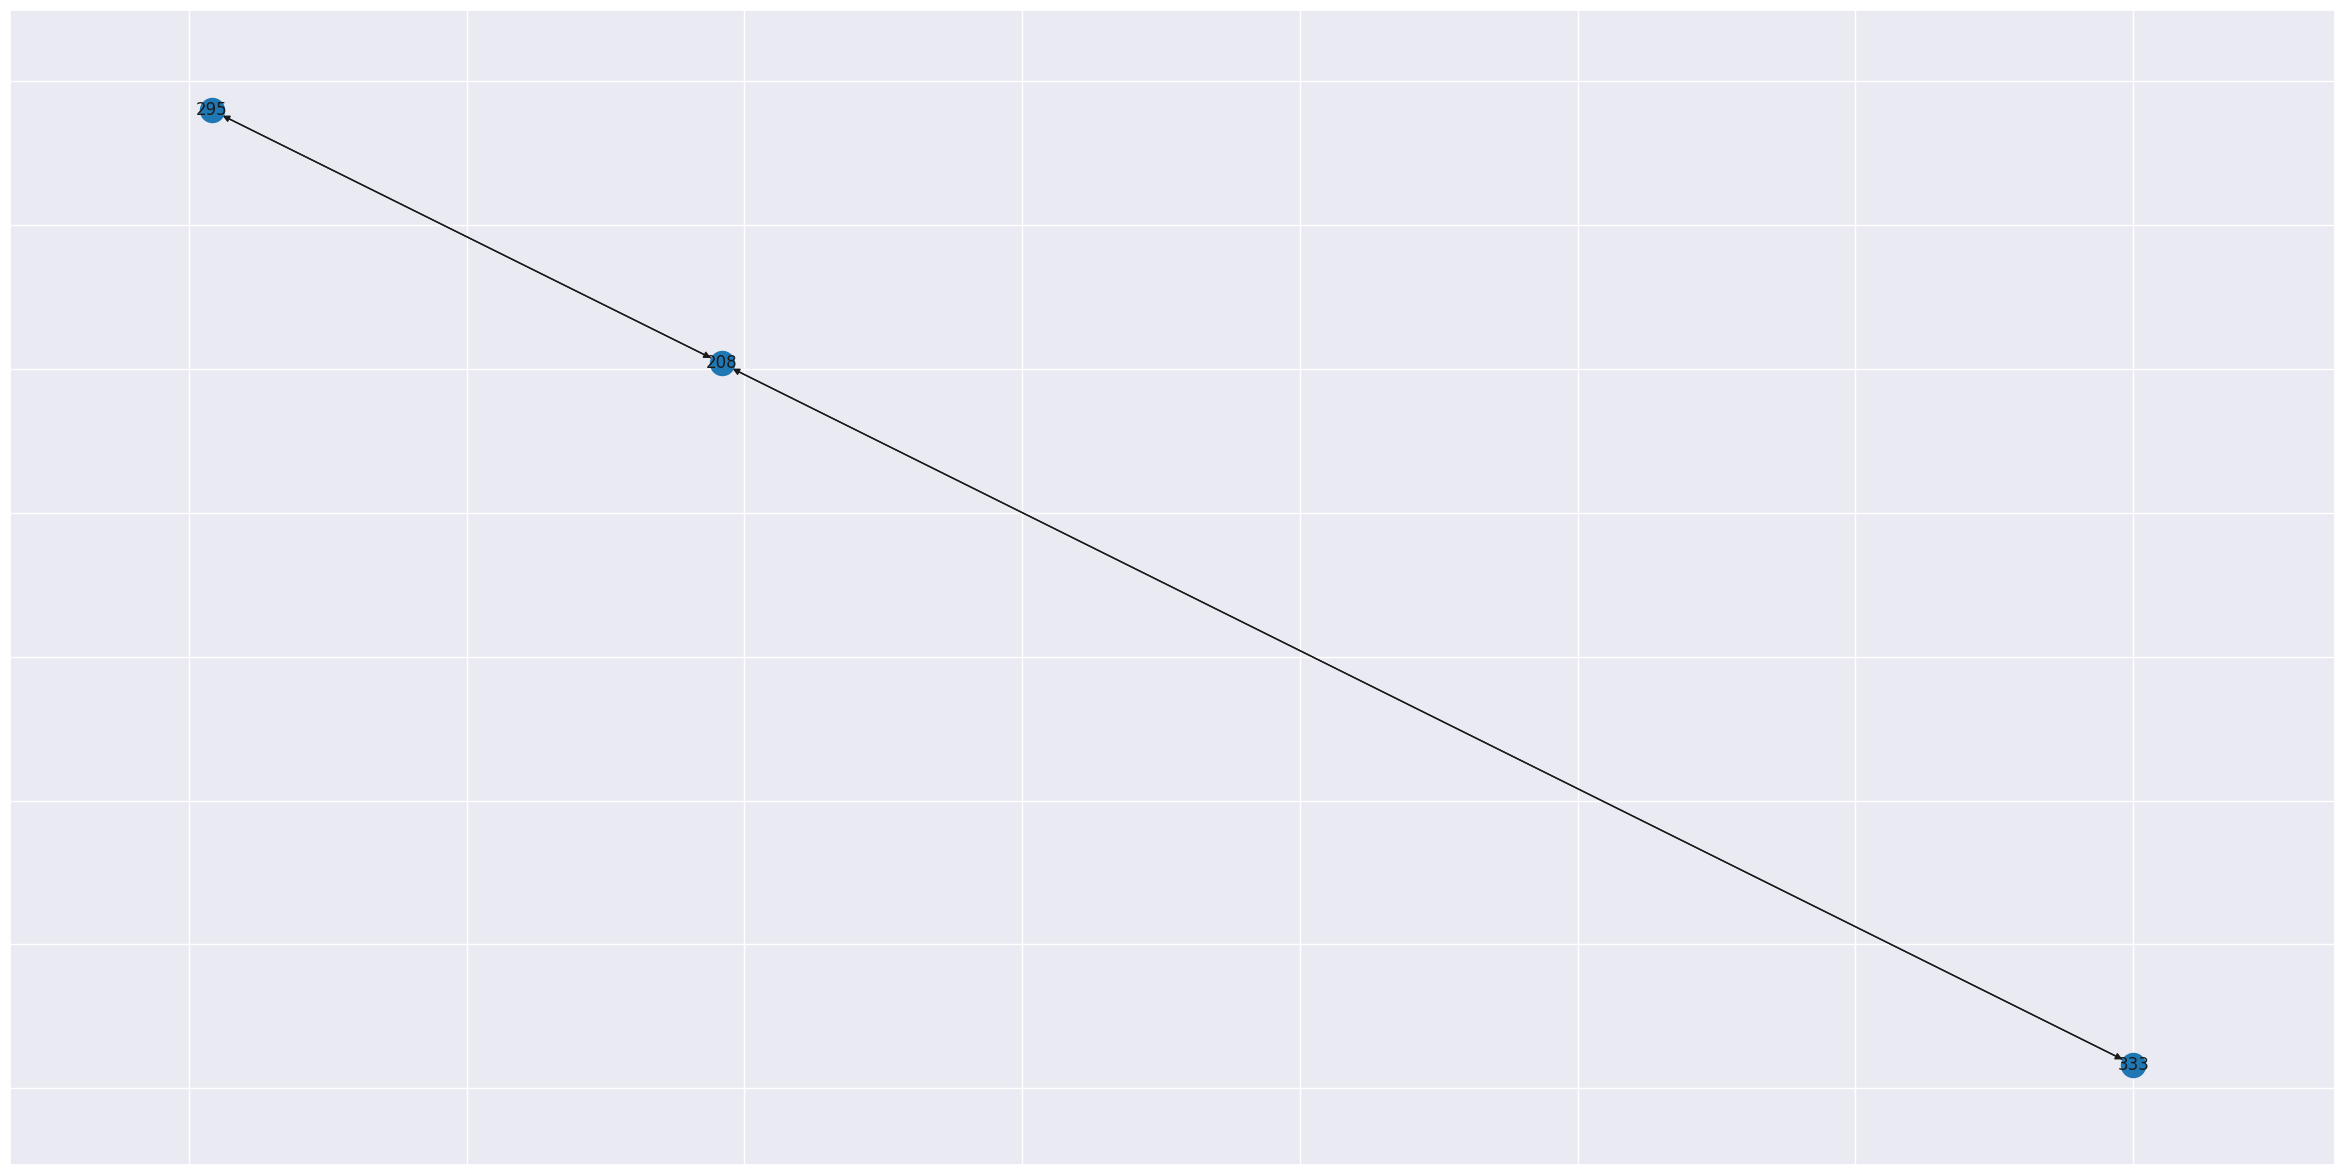

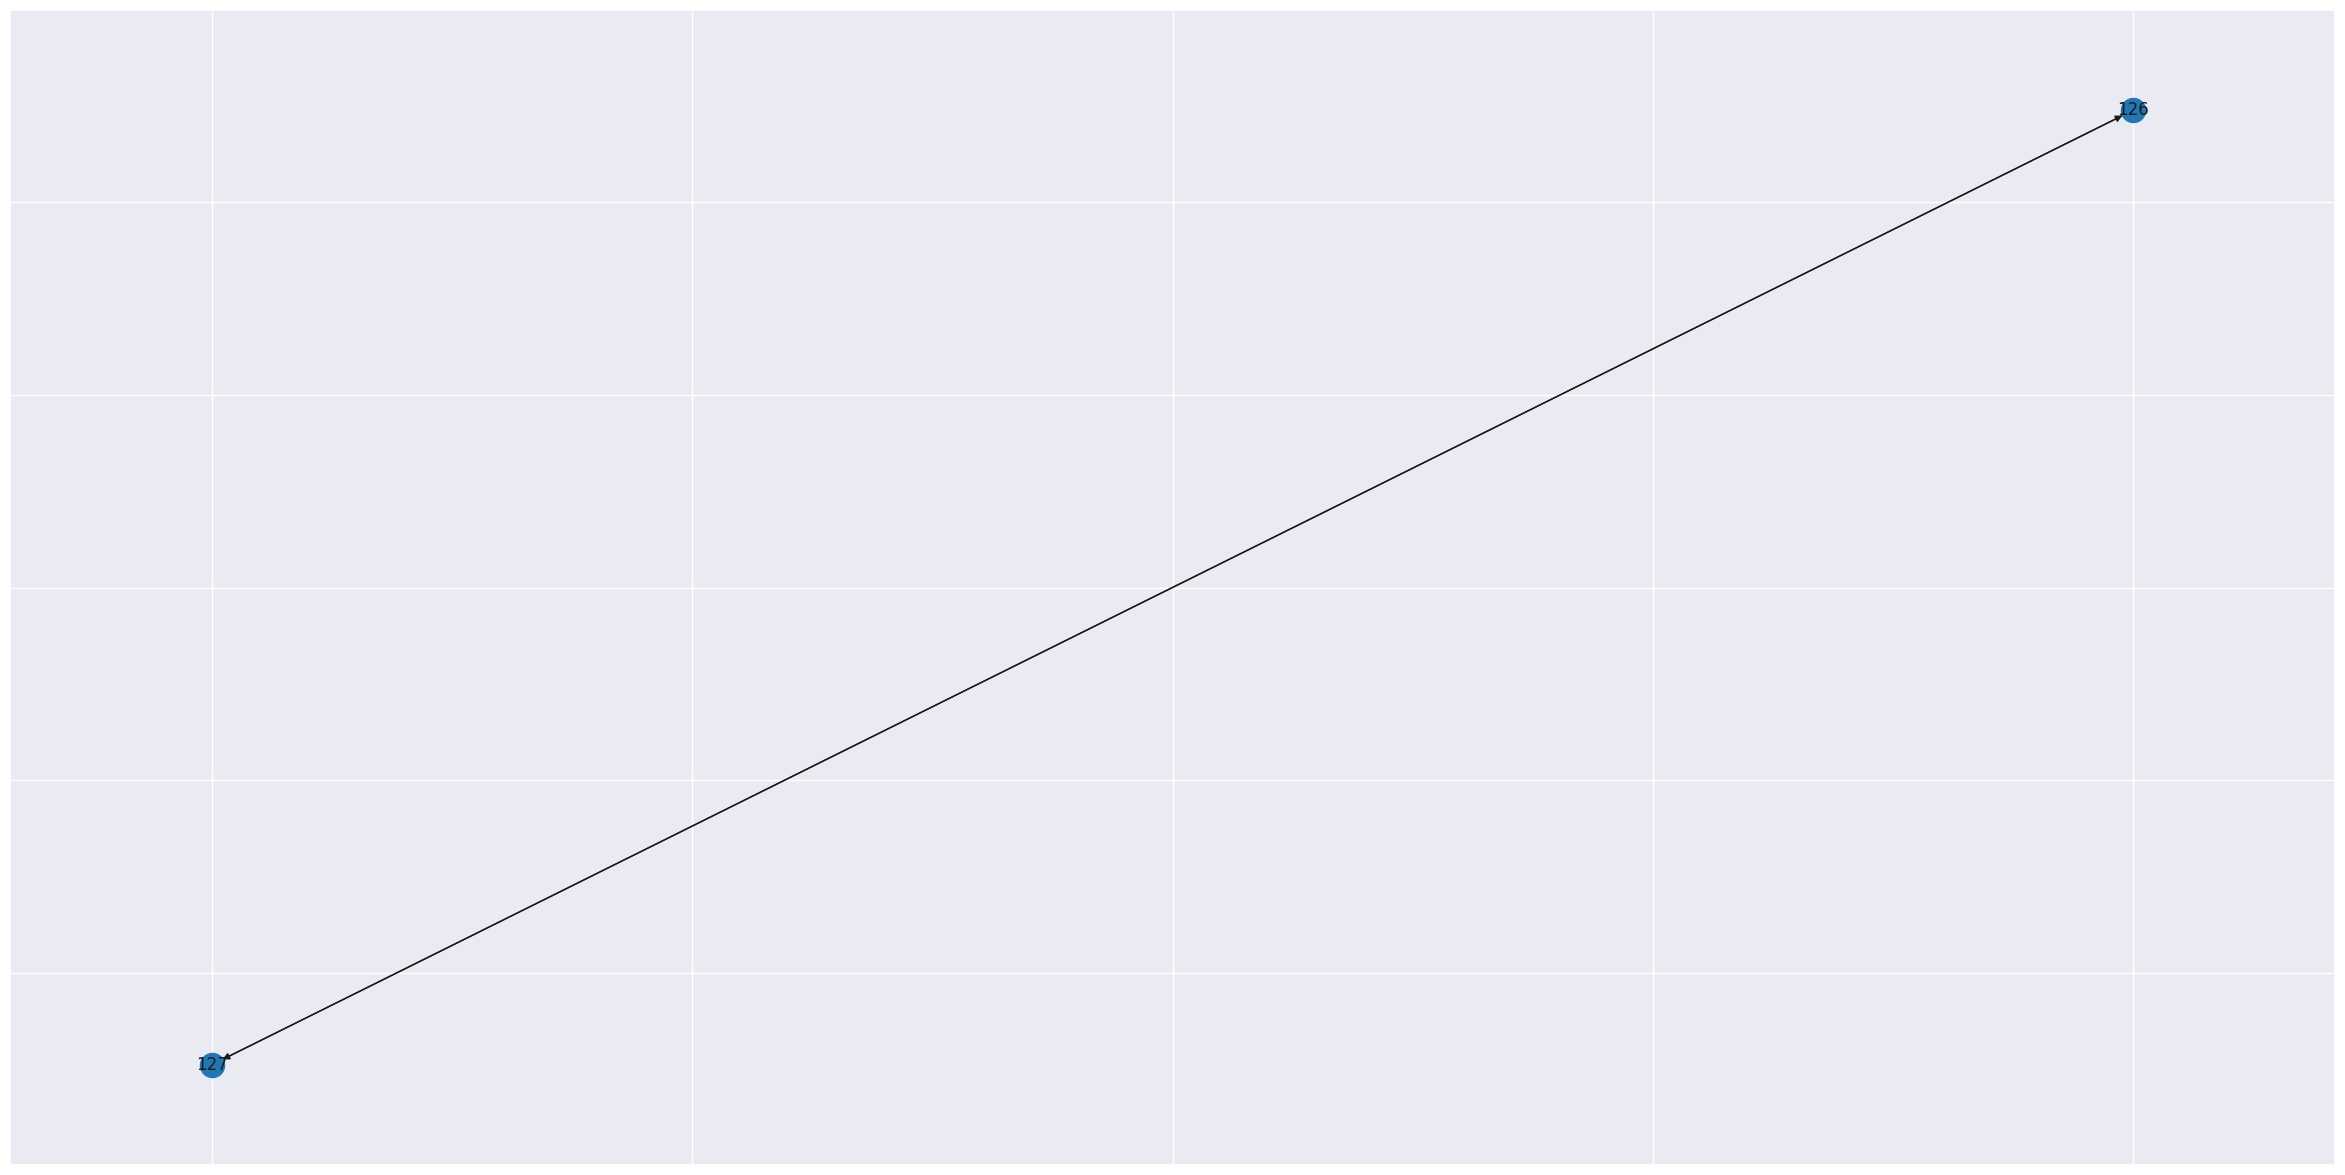

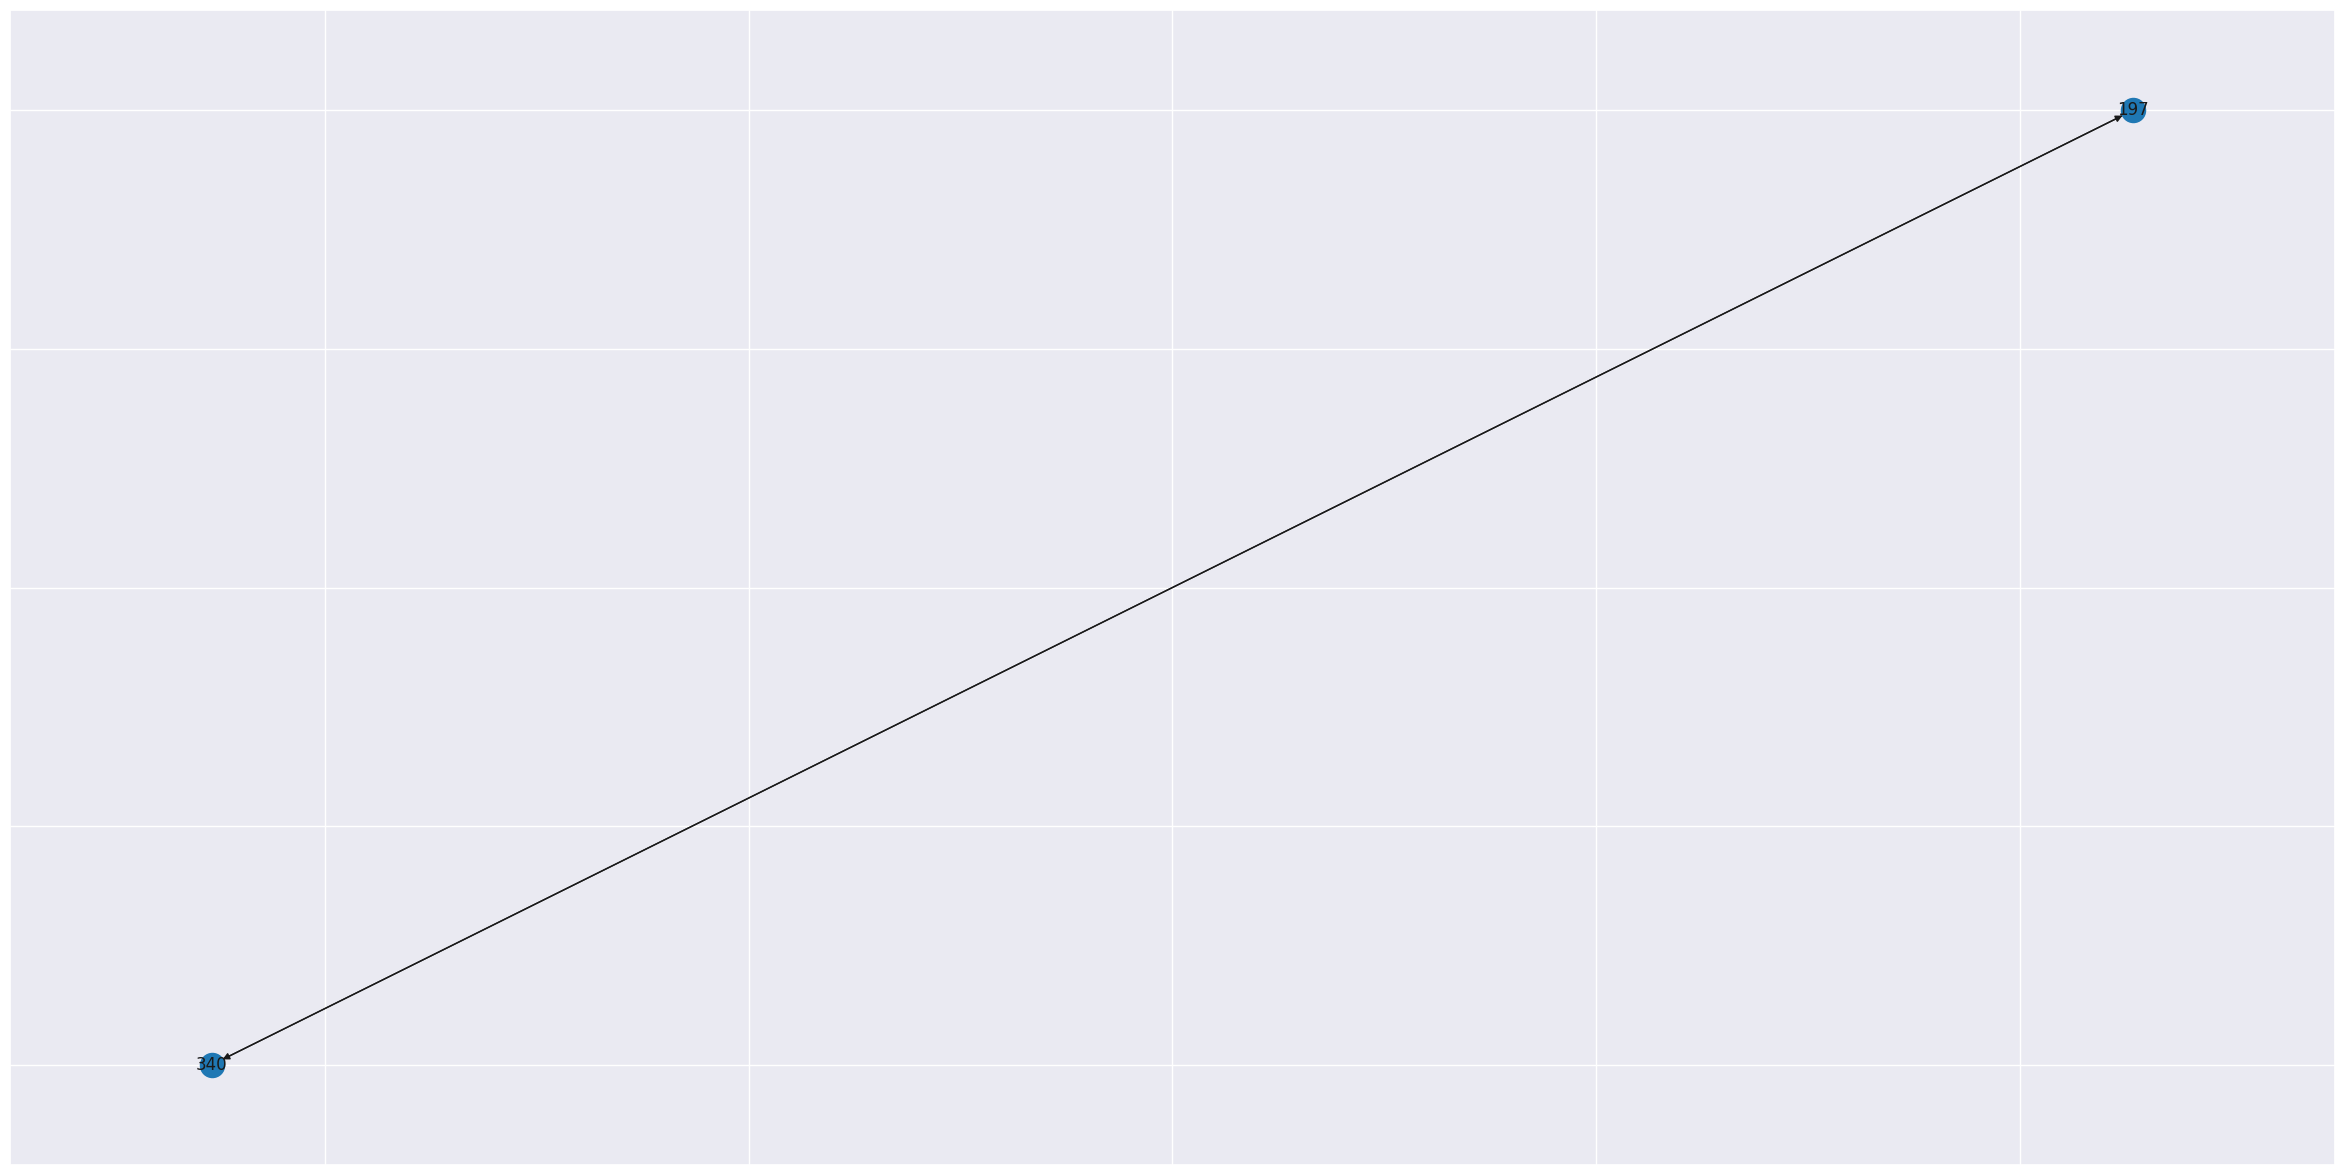

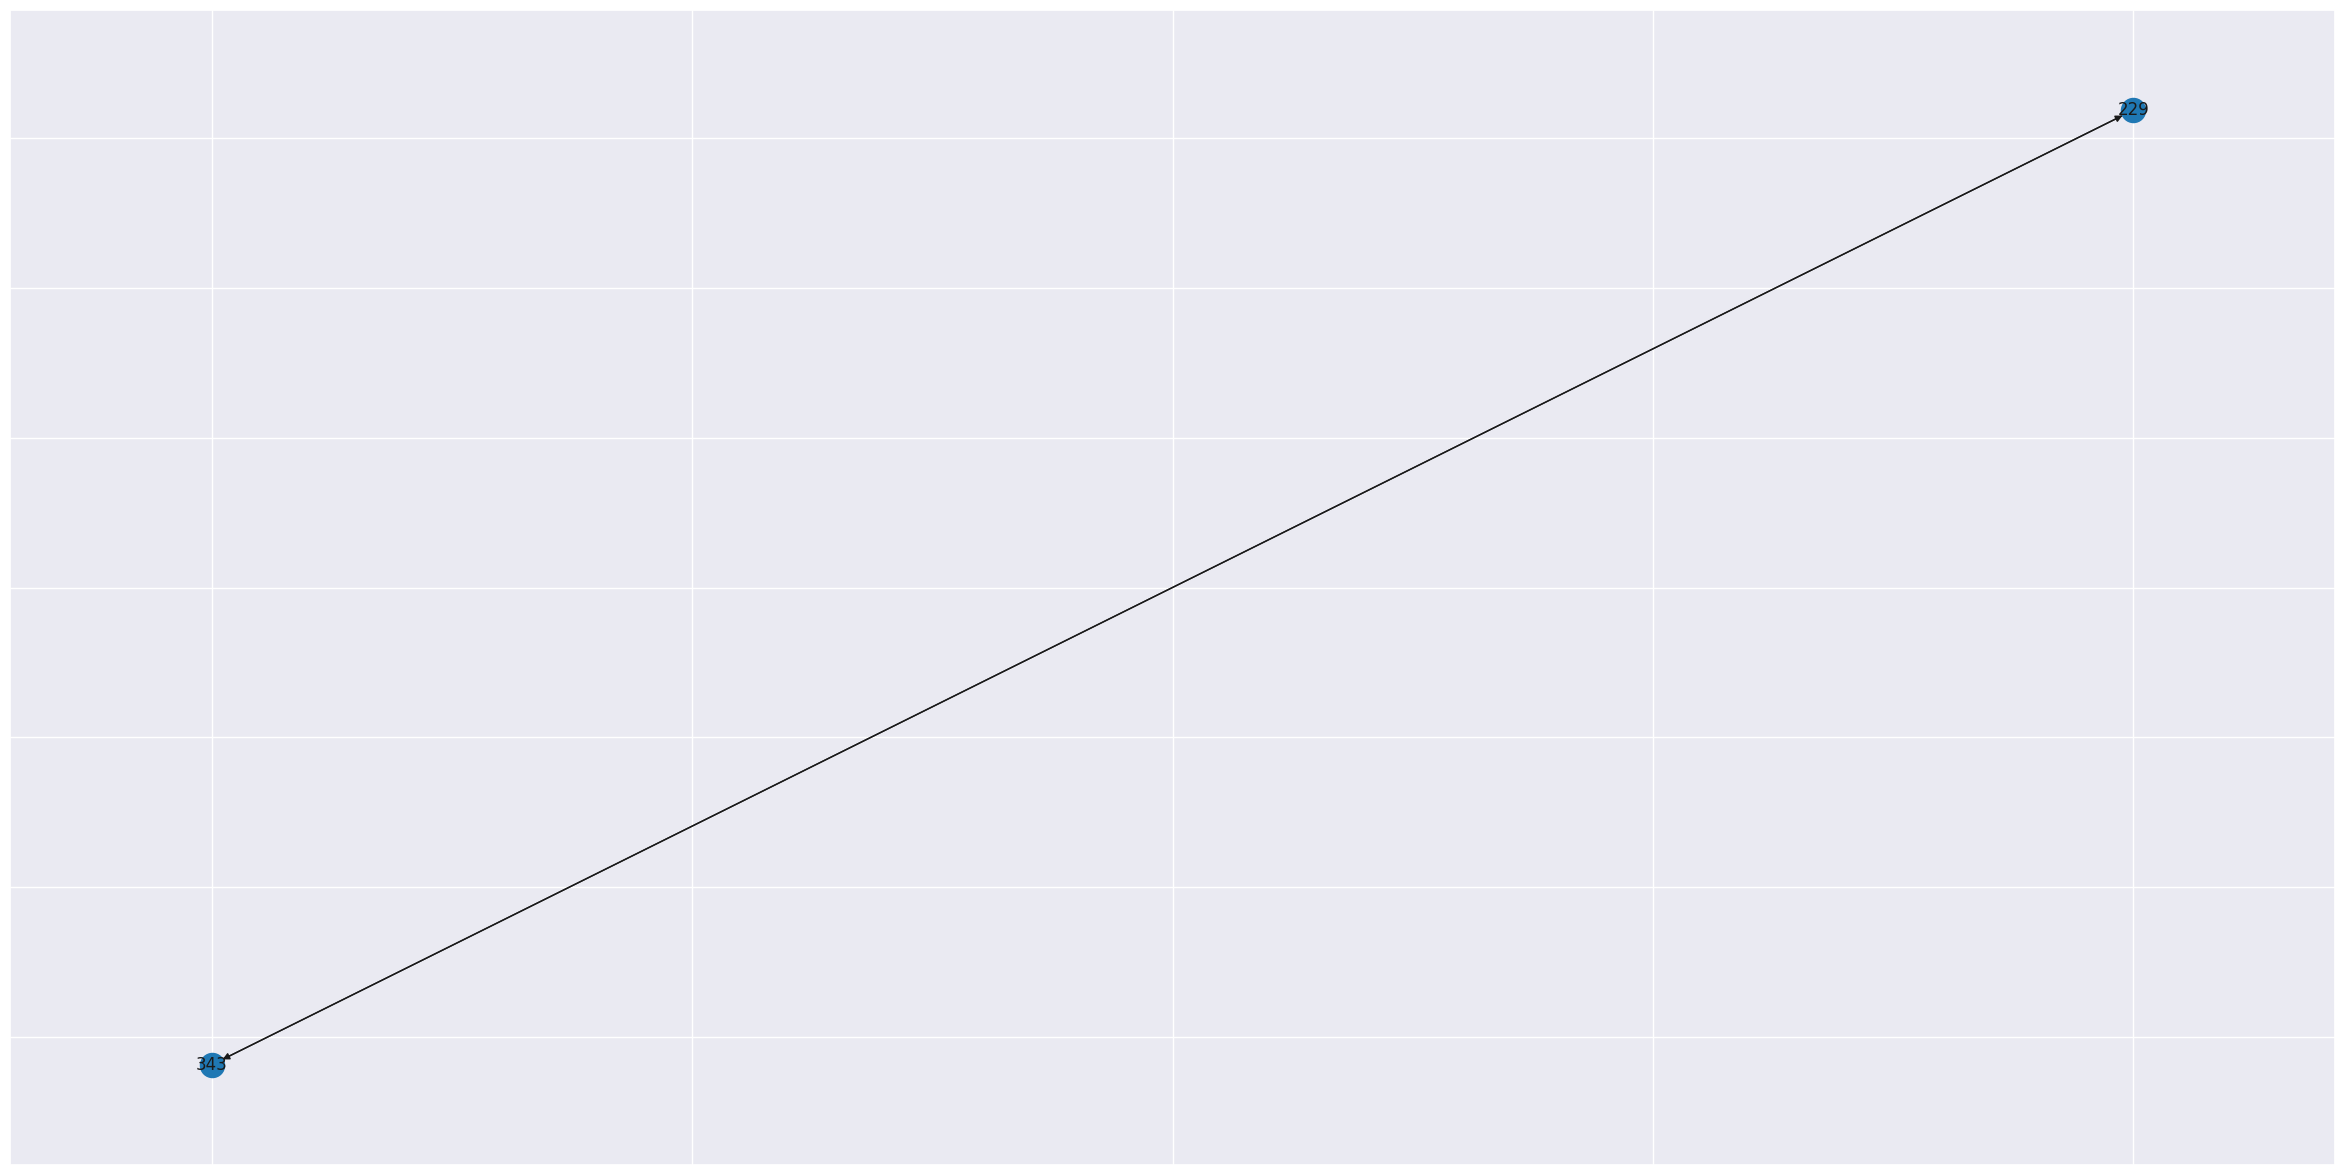

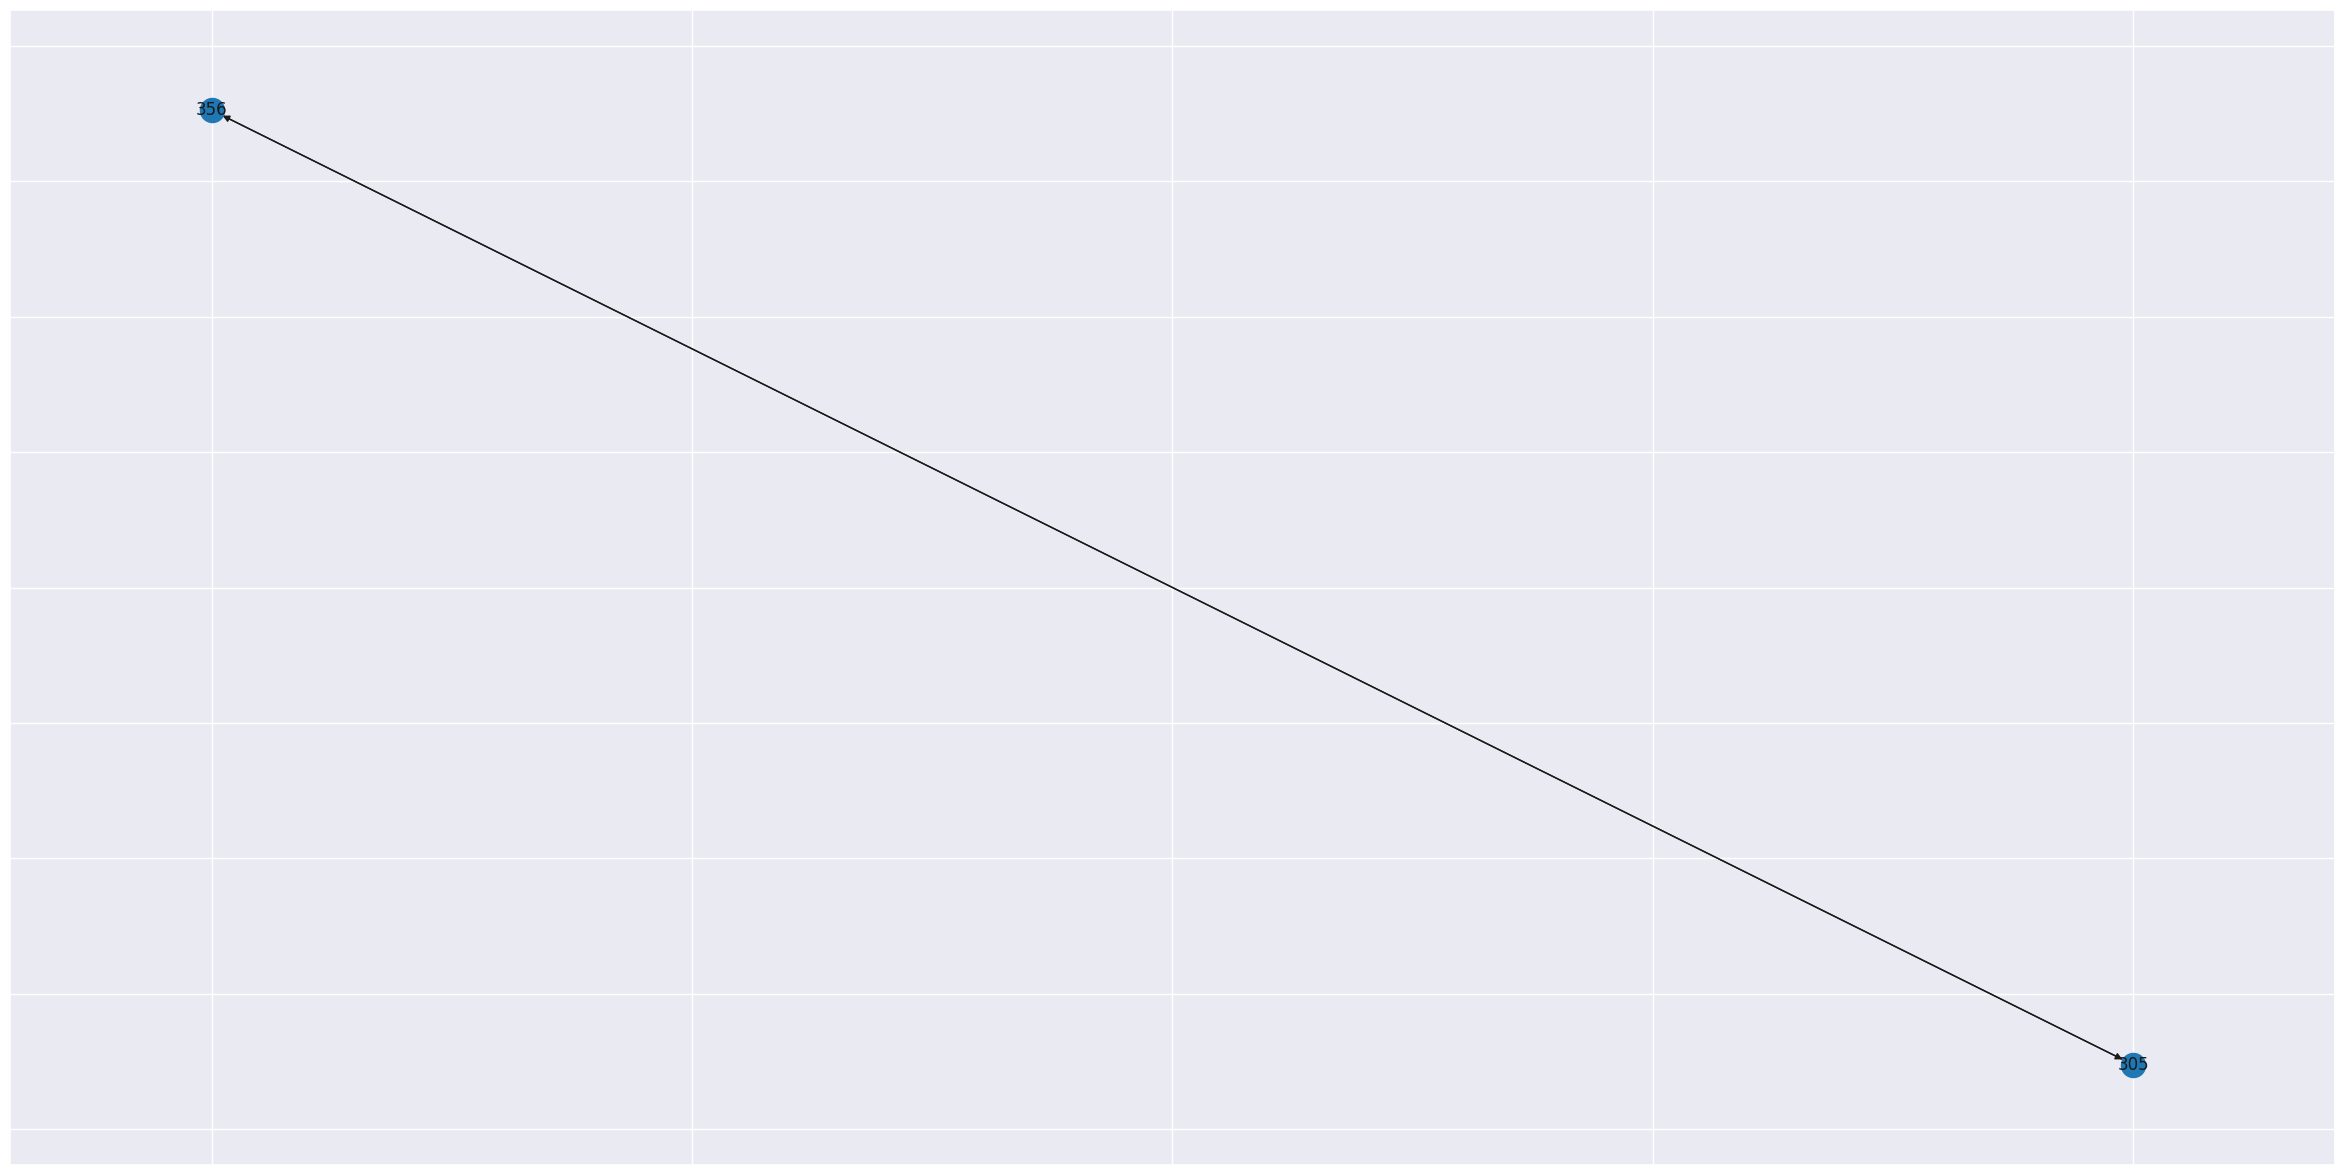

In [105]:

for key in node_class.keys():
    if key != -1:
        fig,ax=plt.subplots(figsize=(30,15))
        cluster=node_class[key]
        sub_graph=di_G.subgraph(cluster)
        print(sub_graph)
        nx.draw_networkx(sub_graph)    

        for x in sub_graph.edges():
            print("****",sub_graph[x[0]][x[1]]["weight"])